<a href="https://colab.research.google.com/github/KamDaXay/Spotify/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Independencies**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

## **Import Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UIT/Ky 5/DS105/DO_AN/Data/df_combined_final.csv').drop_duplicates()
df.head()

Unnamed: 0                             track_uri  \
0           0  spotify:track:3un8UkiPHJjlsrTHQnisXH   
1           1  spotify:track:6KgZf5gZgF1KLNxq1qZgHP   
2           2  spotify:track:4acXEYw7ayyJnm9GXDrqiL   
3           3  spotify:track:0kHgteR4TV4LO80wrasDSR   
4           4  spotify:track:08ULi904W2Po6pVj8nN7KC   

                    track_name artist_name  artist_pop  \
0                    Từng Quen  Wren Evans          54   
1       Anh Là Ngoại Lệ Của Em   Phương Ly          54   
2  Hit Me Up (feat. Nomovodka)        Binz          54   
3                      Bạn Đời       Karik          52   
4               đưa em về nhàa      GREY D          58   

                                       artist_genres  \
0  ['v-pop', 'vietnamese hip hop', 'vietnamese me...   
1                                          ['v-pop']   
2                    ['v-pop', 'vietnamese hip hop']   
3                    ['v-pop', 'vietnamese hip hop']   
4                                          ['v-pop']   

                         album  track_pop  danceability  energy  ...  \
0                    Từng Quen         71         0.758   0.246  ...   
1       Anh Là Ngoại Lệ Của Em         70         0.844   0.677  ...   
2  Hit Me Up (feat. Nomovodka)         70         0.775   0.440  ...   
3                      Bạn Đời         71         0.843   0.484  ...   
4               đưa em về nhàa         67         0.664   0.531  ...   

   vietnamese bolero  indie viet  vietnamese trap  vietnamese hip hop  \
0                  0           0                0                   1   
1                  0           0                0                   0   
2                  0           0                0                   1   
3                  0           0                0                   1   
4                  0           0                0                   0   

   viet remix  viet lo-fi  viet instrumental  year  v_pop v_rap  
0           0           0                  0  2023    1.0   1.0  
1           0           0                  0  2023    1.0   0.0  
2           0           0                  0  2023    1.0   0.0  
3           0           0                  0  2023    1.0   0.0  
4           0           0                  0  2023    1.0   0.0  

[5 rows x 38 columns]

In [ ]:
def print_sample(df, year):
  print('Number of samples: ',df.loc[df.year==year].shape[0])
  print('Average Mean: ',df.loc[df.year==year]['speechiness'].mean())

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_uri', 'track_name', 'artist_name', 'artist_pop',
       'artist_genres', 'album', 'track_pop', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'duration_ms', 'time_signature',
       'date', 'checked_date', 'rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'year', 'v_pop', 'v_rap'],
      dtype='object')

In [ ]:
print_sample(df, 2015)

Number of samples:  60
Average Mean:  0.06478166666666667


In [ ]:
print_sample(df, 2023)

Number of samples:  437
Average Mean:  0.07861189931350114


In [ ]:
df.loc[df.year==2015]['speechiness']

263     0.0390
372     0.0381
425     0.2390
500     0.0300
502     0.0491
717     0.0311
719     0.0370
722     0.0305
742     0.0282
764     0.0318
778     0.0307
1066    0.0381
1090    0.0280
1092    0.0278
1093    0.0326
1098    0.0469
1112    0.0624
1118    0.0290
1121    0.0254
1124    0.0334
1125    0.0233
1131    0.0997
1132    0.0296
1141    0.0331
1145    0.0366
1166    0.2390
1169    0.0315
1198    0.0266
1206    0.0289
1311    0.0371
1329    0.4640
1432    0.0274
1437    0.0233
1438    0.0287
1447    0.0257
1452    0.0344
1455    0.0287
1458    0.0421
1461    0.0333
1465    0.0266
1471    0.0287
1483    0.0320
1503    0.0294
1615    0.1760
1717    0.0342
1825    0.0286
1977    0.0334
1978    0.0381
1992    0.2390
2005    0.0371
2015    0.0316
2021    0.0233
2073    0.0280
2131    0.0271
2165    0.0266
2179    0.0288
2187    0.0383
2229    0.1390
2335    0.1760
2420    0.4640
Name: speechiness, dtype: float64

In [ ]:
df.groupby(['year'])['speechiness'].mean()

year
1988    0.032157
1989    0.025800
1990    0.035200
1991    0.030900
1992    0.027967
1993    0.031517
1994    0.031180
1995    0.031850
1996    0.032225
1997    0.028657
1998    0.032800
1999    0.033689
2000    0.031333
2001    0.032317
2002    0.045471
2003    0.091200
2004    0.030922
2005    0.056943
2006    0.030614
2007    0.033560
2008    0.029833
2009    0.033314
2010    0.087068
2011    0.076367
2012    0.056700
2013    0.038011
2014    0.038975
2015    0.064782
2016    0.064260
2017    0.052533
2018    0.063240
2019    0.067681
2020    0.085493
2021    0.082702
2022    0.064216
2023    0.078612
Name: speechiness, dtype: float64

# **EDA1**

Text(0.5, 1.0, 'Regplot of artist_pop and track_pop')

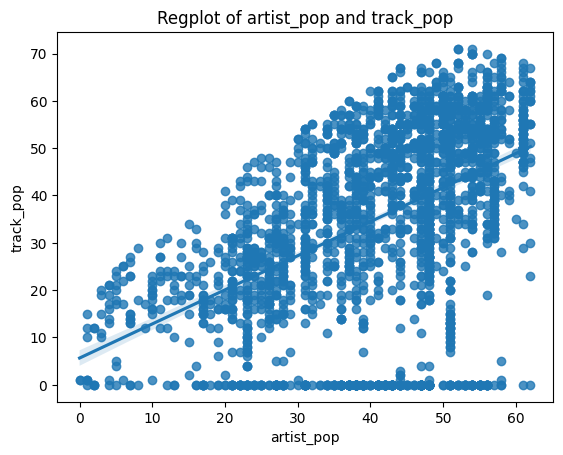

In [ ]:
sn.regplot(data=df, x='artist_pop', y='track_pop').set_title('Regplot of artist_pop and track_pop')

Text(0.5, 1.0, 'Zero-popular Songs')

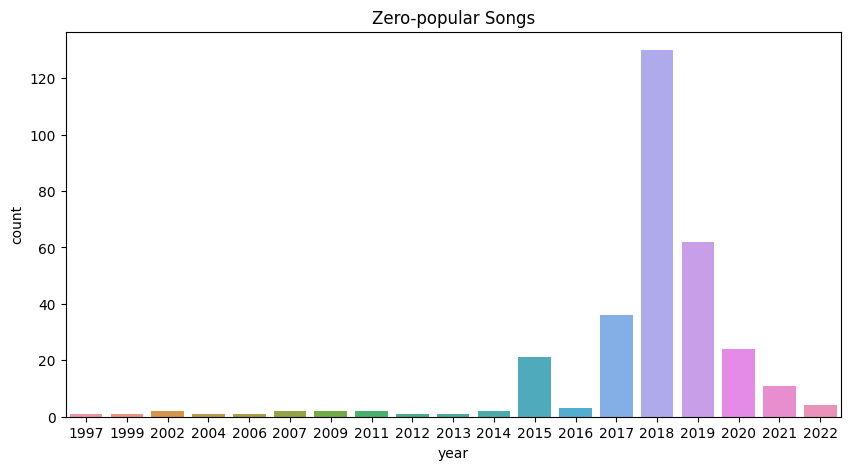

In [ ]:
plt.figure(figsize=(10, 5))
sn.countplot(data=df.loc[df.track_pop==0], x='year').set_title('Zero-popular Songs')

In [ ]:
df_1 = df.drop(['checked_date', 'rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'v_pop', 'v_rap', 'key', 'mode', 'time_signature'], axis=1)
df_1.drop(df_1.loc[df_1.track_pop==0].index, axis=0, inplace=True)

In [ ]:
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

<ipython-input-52-2499d1066664>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df_1.corr(), annot=True, fmt='.1f', cmap='Blues', ax=ax_dict['B']).set_title('Correlation  between features')


Text(0.5, 1.0, 'Correlation  between features')

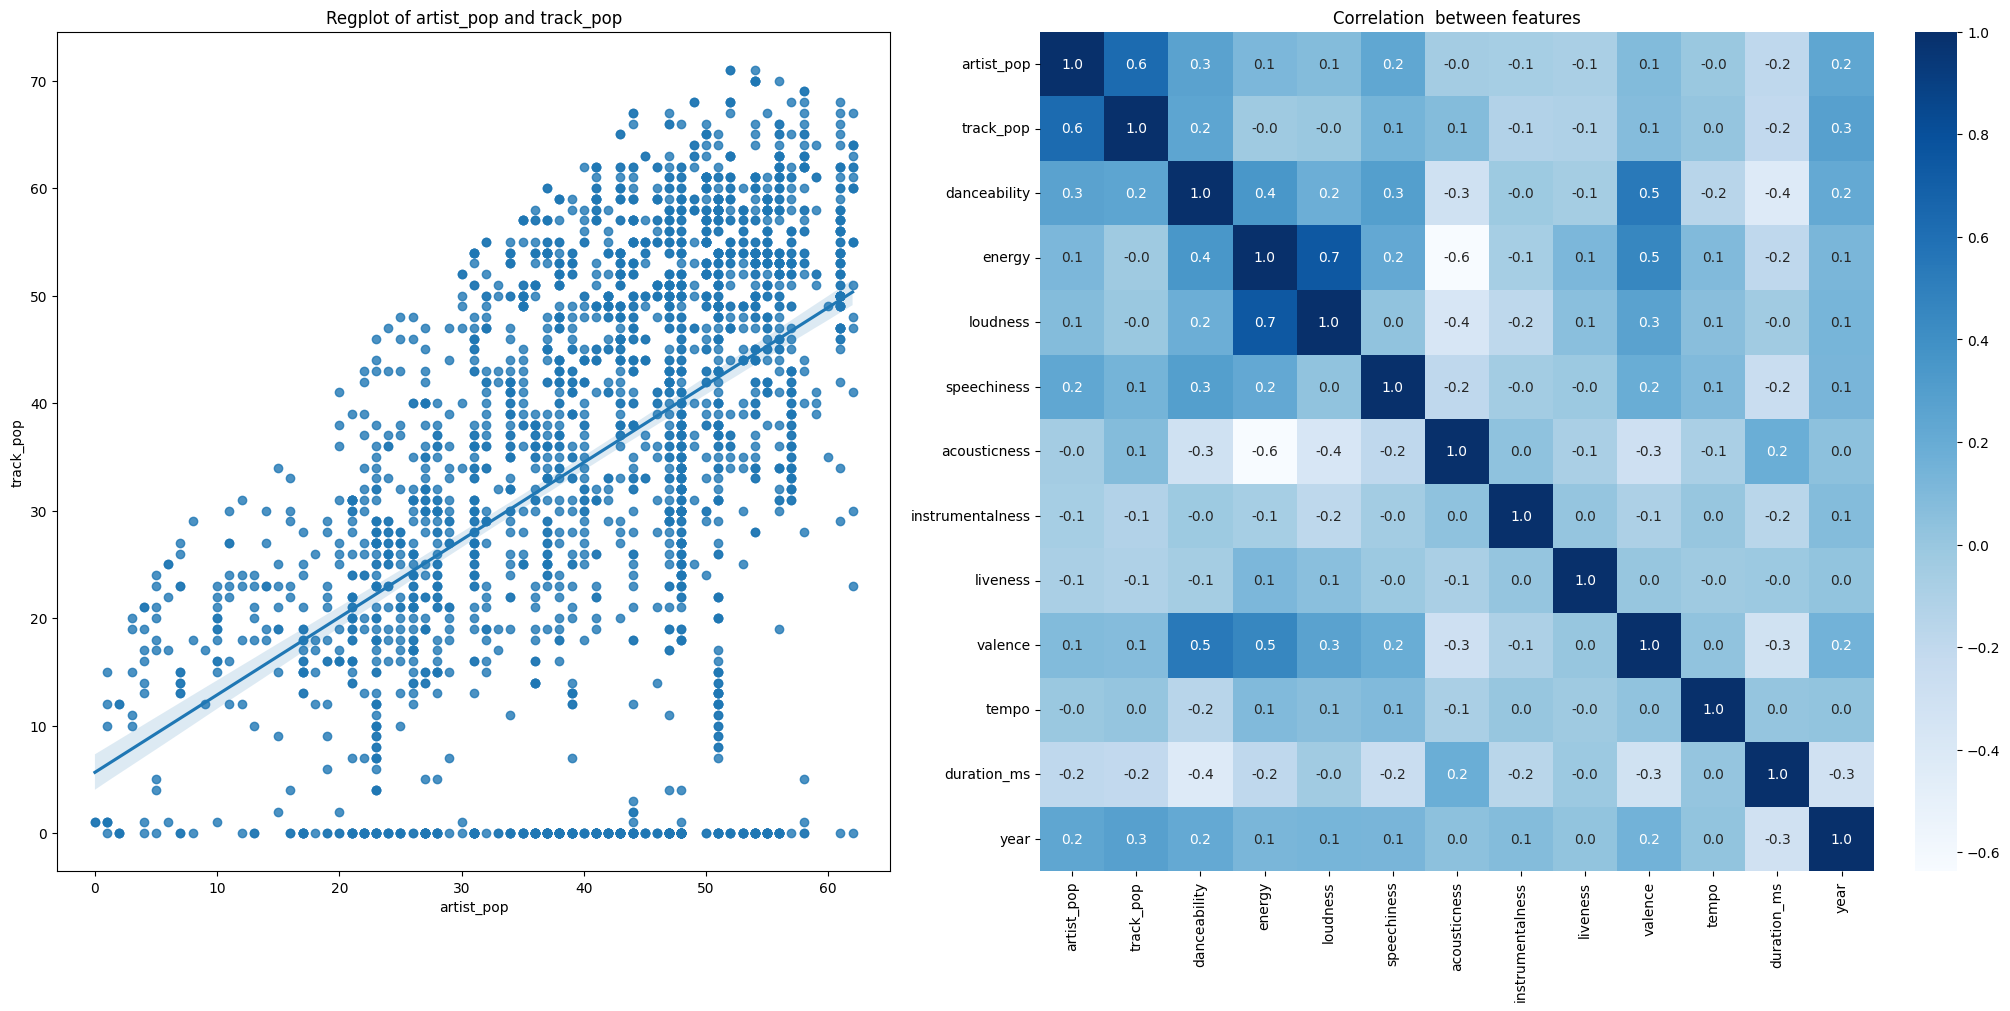

In [ ]:
fig = plt.figure(figsize=(20, 10),
                 layout="constrained")
ax_dict = fig.subplot_mosaic(
    """AB"""
)

sn.regplot(data=df, x='artist_pop', y='track_pop', ax=ax_dict['A']).set_title('Regplot of artist_pop and track_pop')
sn.heatmap(df_1.corr(), annot=True, fmt='.1f', cmap='Blues', ax=ax_dict['B']).set_title('Correlation  between features')
# sn.countplot(data=df.loc[df.track_pop==0], x='year', ax=ax_dict['D']).set_title('Zero-popular Songs')


In [ ]:
df.loc[df.track_pop==0]

Unnamed: 0                             track_uri  \
96            96  spotify:track:2FjjM4a4ISKFqC3sMfIj9j   
101          101  spotify:track:3kzM6rV8wZbeGIpShiMnTR   
198          198  spotify:track:3rZYyvpOtgZzRDs0EzGocq   
211          211  spotify:track:0ZaHfA4m7SlE2QHA3KNoXj   
216          216  spotify:track:2LykruN1mQlg9nuUaE7dvQ   
...          ...                                   ...   
1832        1832  spotify:track:5oNsFsxzM2WQR8Kuu2VXan   
2081        2081  spotify:track:1yxb8y2b5YTXakgFlgxWE4   
2105        2105  spotify:track:7hyoJ4h19L6q5SUPRZ5WHB   
2116        2116  spotify:track:7f9C0ua9JVlaQ1AKa8Zm90   
2278        2278  spotify:track:1EzGZdwseL6PanSPy67gd4   

                               track_name       artist_name  artist_pop  \
96                              Don't Côi       RPT Orijinn          47   
101         năm ngoái giờ này (after all)  Phùng Khánh Linh          36   
198   Chỉ Muốn Bên Em Lúc Này (Lofi Ver.)             Orinn          48   
211                            Em Có Nghe               Kha          35   
216                              Nàng Thơ        Hoàng Dũng          53   
...                                   ...               ...         ...   
1832                        Con Do Lo Hen        Hương Thủy          21   
2081                      Một Lần Dang Dở            Hà Vân          23   
2105                      Em Về Với Người            Hà Vân          23   
2116                           Duyên Kiếp         Trường Vũ          33   
2278                    Thì Thầm Mùa Xuân          Thu Minh          23   

                                         artist_genres  \
96    ['vietnamese hip hop', 'vietnamese melodic rap']   
101                                          ['v-pop']   
198          ['viet lo-fi', 'viet remix', 'vinahouse']   
211                            ['indie viet', 'v-pop']   
216          ['v-pop', 'vietnamese singer-songwriter']   
...                                                ...   
1832                                ['vietnamese pop']   
2081                             ['vietnamese bolero']   
2105                             ['vietnamese bolero']   
2116                             ['vietnamese bolero']   
2278                                         ['v-pop']   

                              album  track_pop  danceability  energy  ...  \
96                        Don't Côi          0         0.767   0.405  ...   
101   năm ngoái giờ này (after all)          0         0.562   0.787  ...   
198              Lâu Phai #2 (LOFI)          0         0.716   0.308  ...   
211                      Em Có Nghe          0         0.875   0.450  ...   
216                        Nàng Thơ          0         0.512   0.456  ...   
...                             ...        ...           ...     ...  ...   
1832           Chuyen Nguoi Con Gai          0         0.647   0.512  ...   
2081           Tuyển Tập Của Hà Vân          0         0.731   0.527  ...   
2105                 Xin Trả Tôi Về          0         0.571   0.472  ...   
2116            Liveshow Duyên Phận          0         0.449   0.442  ...   
2278                       Gót Hồng          0         0.617   0.212  ...   

      vietnamese bolero  indie viet  vietnamese trap  vietnamese hip hop  \
96                    0           0                0                   1   
101                   0           0                0                   0   
198                   0           0                0                   0   
211                   0           1                0                   0   
216                   0           0                0                   0   
...                 ...         ...              ...                 ...   
1832                  0           0                0                   0   
2081                  1           0                0                   0   
2105                  1           0                0                   0   
2116                  1   

* Categorical Features: `[
 'rock viet',
 'v_rap',
 'vinahouse',
 'viet edm',
 'v_pop',
 'mainland se asia metal',
 'vietnamese bolero',
 'indie viet',
 'vietnamese trap',
 'vietnamese hip hop',
 'viet remix',
 'viet lo-fi',
 'viet instrumental',
 'mode',
 'time_signature',
 'key']`

In [ ]:
df.loc[df['mainland se']==1]

track_uri                        track_name  \
503  spotify:track:06b5NkFfMHB9PN6liRpFdd         Tuyết Trắng & Đỗ Quyên Đỏ   
510  spotify:track:6Q7QAdOvmzVdZh0vghkwnB                    Bông Hồng Xanh   
515  spotify:track:0QZoBUTqosMmeysJ7YZVRY                    Mua Dong O Lai   
521  spotify:track:2pe36slgiBpxAbDXluEgMc  Nơi đó có chúng ta thuộc về nhau   
532  spotify:track:1sfJcVlw3qSTnsMkOkMglt                 Beginning Of Hate   

     artist_name  artist_pop  \
503     Ngũ Cung          12   
510    Bức Tường          23   
515    Bức Tường          23   
521    Bức Tường          23   
532  District105           6   

                                         artist_genres  \
503            ['mainland se asia metal', 'rock viet']   
510  ['indie viet', 'mainland se asia metal', 'rock...   
515  ['indie viet', 'mainland se asia metal', 'rock...   
521  ['indie viet', 'mainland se asia metal', 'rock...   
532            ['mainland se asia metal', 'rock viet']   

                                album  track_pop  danceability  energy  key  \
503                            365000         24         0.524   0.768    4   
510                          Cân Bằng         29         0.232   0.327    6   
515               Con Duong Khong Ten         27         0.545   0.580    6   
521  Nơi đó có chúng ta thuộc về nhau         26         0.657   0.655    4   
532                 Beginning Of Hate         17         0.494   0.933    6   

     ...  mainland se asia metal  vietnamese bolero  indie viet  \
503  ...                       1                  0           0   
510  ...                       1                  0           1   
515  ...                       1                  0           1   
521  ...                       1                  0           1   
532  ...                       1                  0           0   

     vietnamese trap  vietnamese hip hop  viet remix  viet lo-fi  \
503                0                   0           0           0   
510                0                   0           0           0   
515                0                   0           0           0   
521                0                   0           0           0   
532                0                   0           0           0   

     viet instrumental v-pop and vietnamese pop  year  
503                  0                        0  2009  
510                  0                        0  2023  
515                  0                        0  2020  
521                  0                        0  2023  
532                  0                        0  2023  

[5 rows x 42 columns]

In [ ]:
cols = list(df.select_dtypes(include=np.number).drop(['year','v_pop',
 'rock viet',
 'v_rap',
 'vinahouse',
 'viet edm',
 'mainland se asia metal',
 'vietnamese bolero',
 'indie viet',
 'vietnamese trap',
 'vietnamese hip hop',
 'viet remix',
 'viet lo-fi',
 'viet instrumental'],axis=1).columns)
cols

['artist_pop',
 'track_pop',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

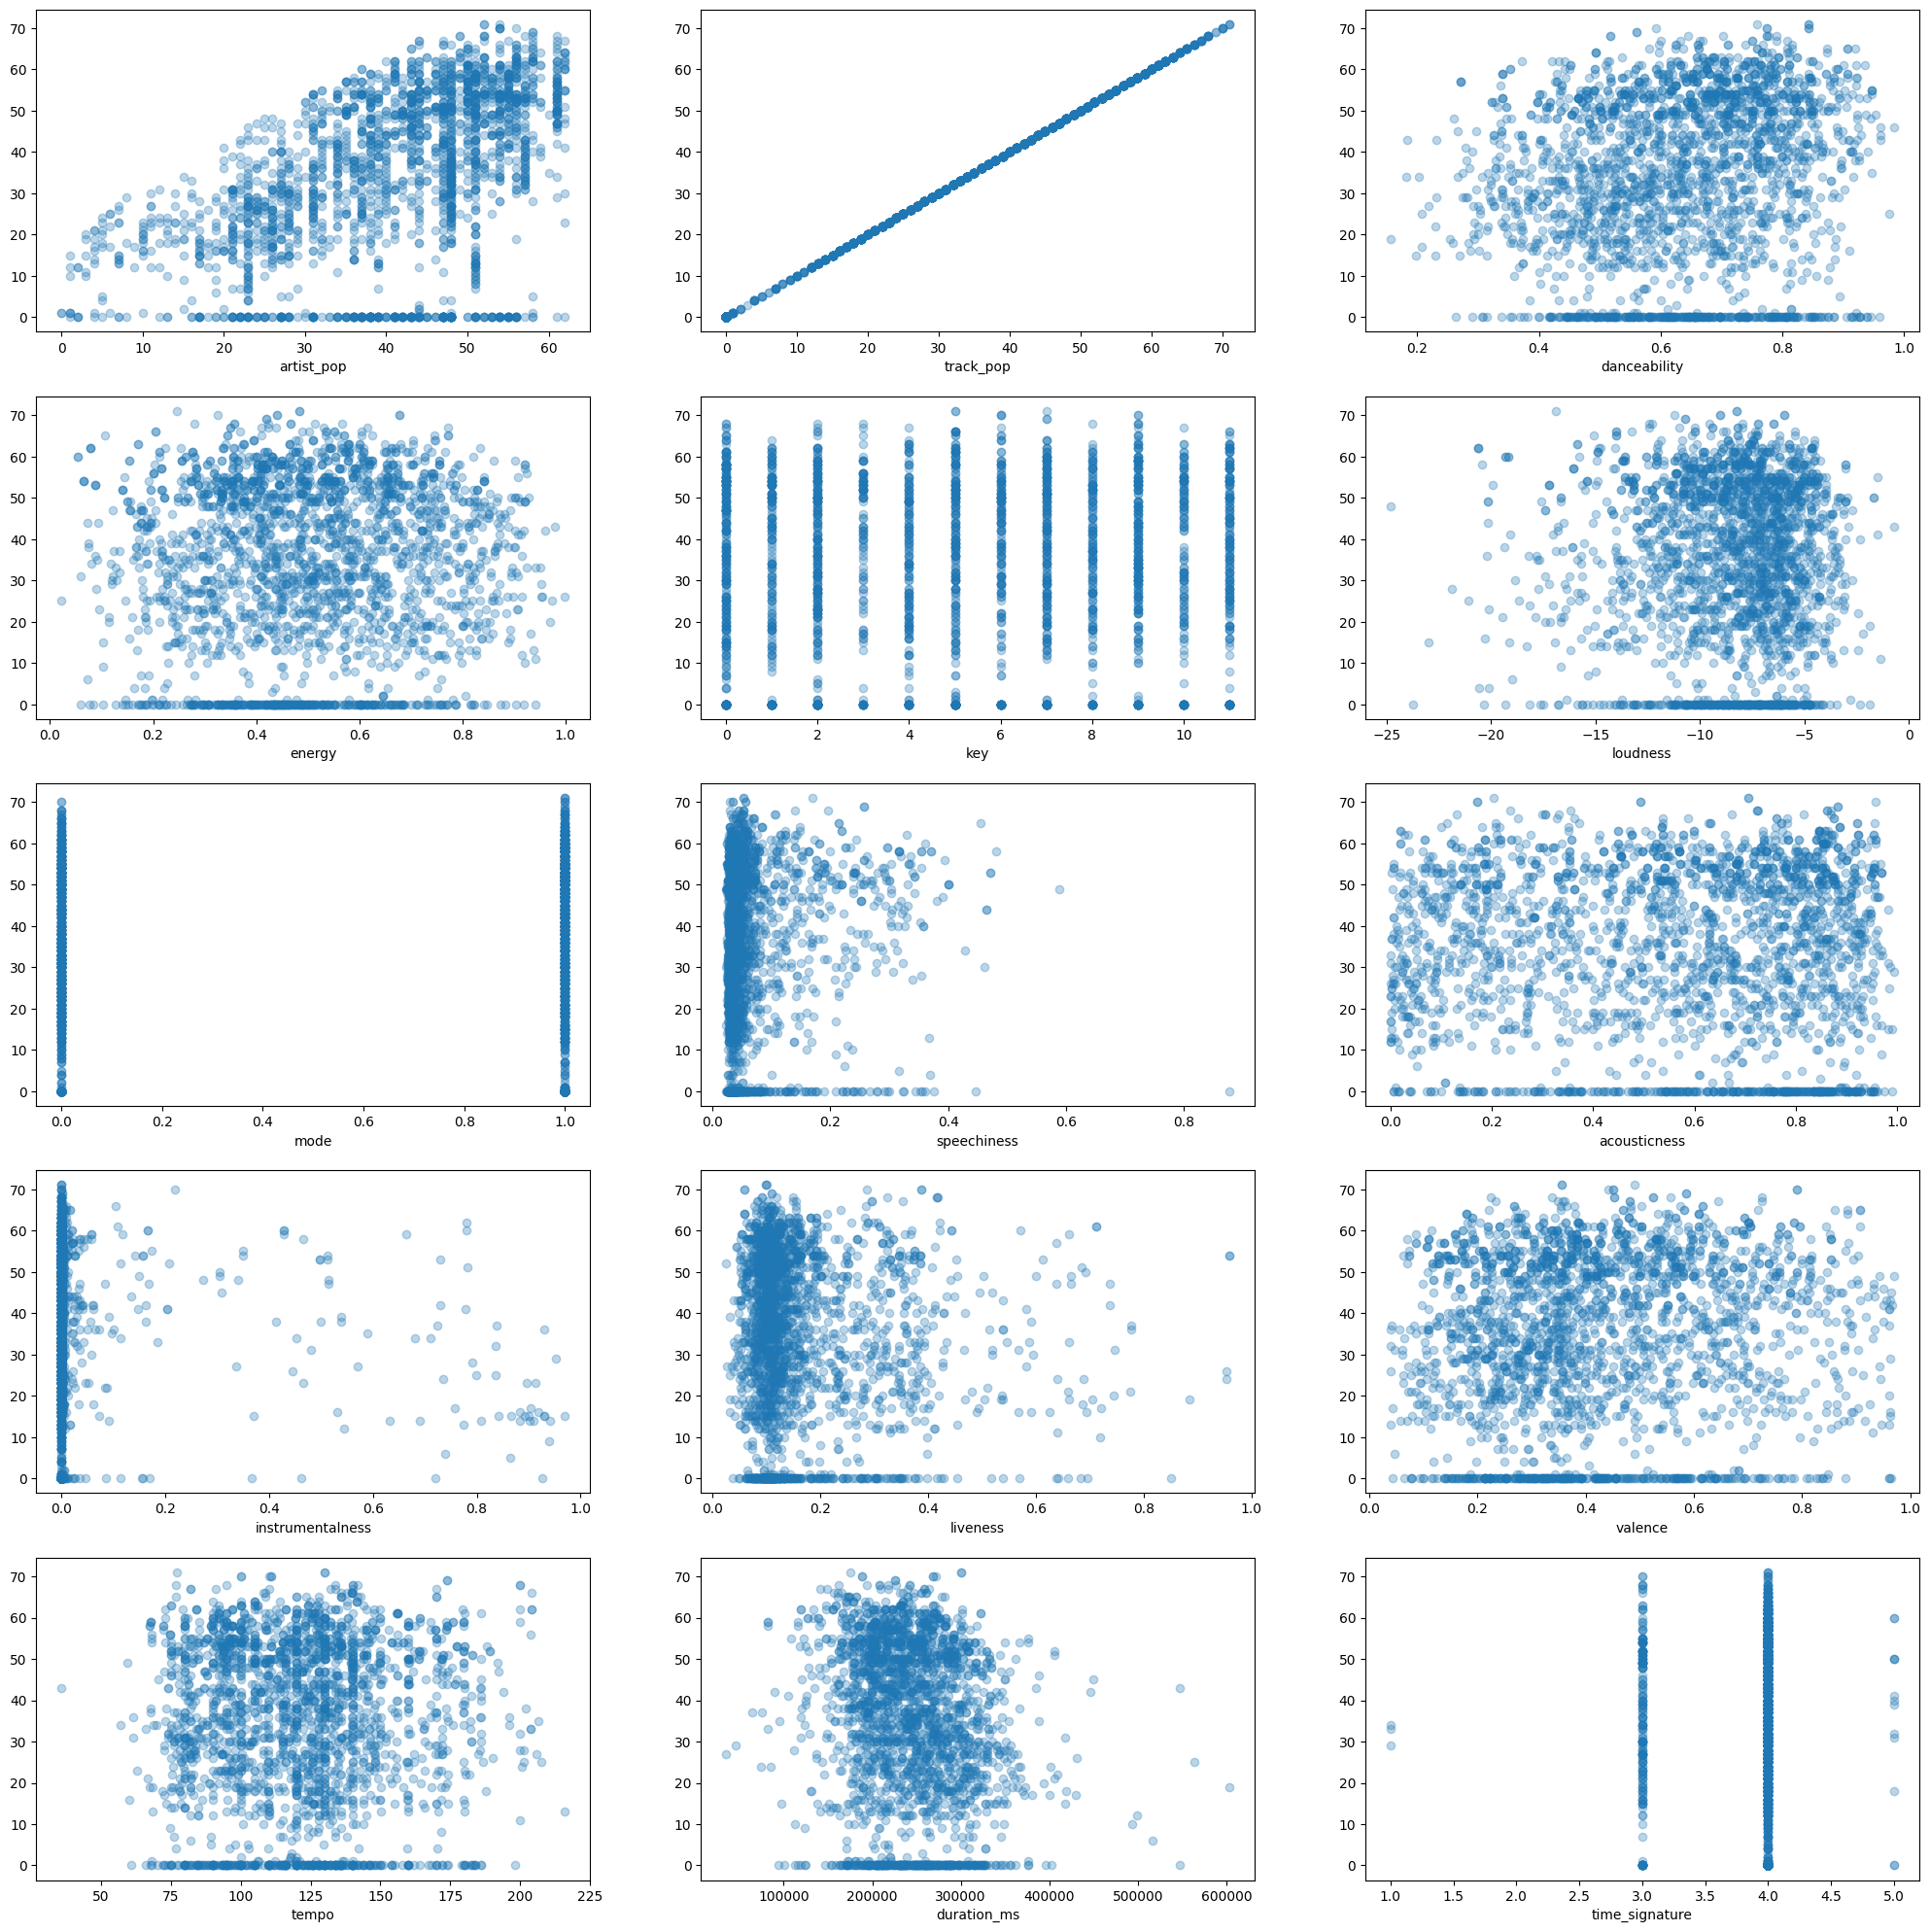

In [ ]:
fig, axs = plt.subplots(nrows=5,
                        ncols=3,
                        figsize=(25, 25))
idx = 0
for i in range(5):
  for j in range(3):
    axs[i, j].scatter(x=df[cols[idx]], y=df.track_pop, alpha=0.3)
    axs[i, j].set_xlabel(cols[idx])
    idx+=1

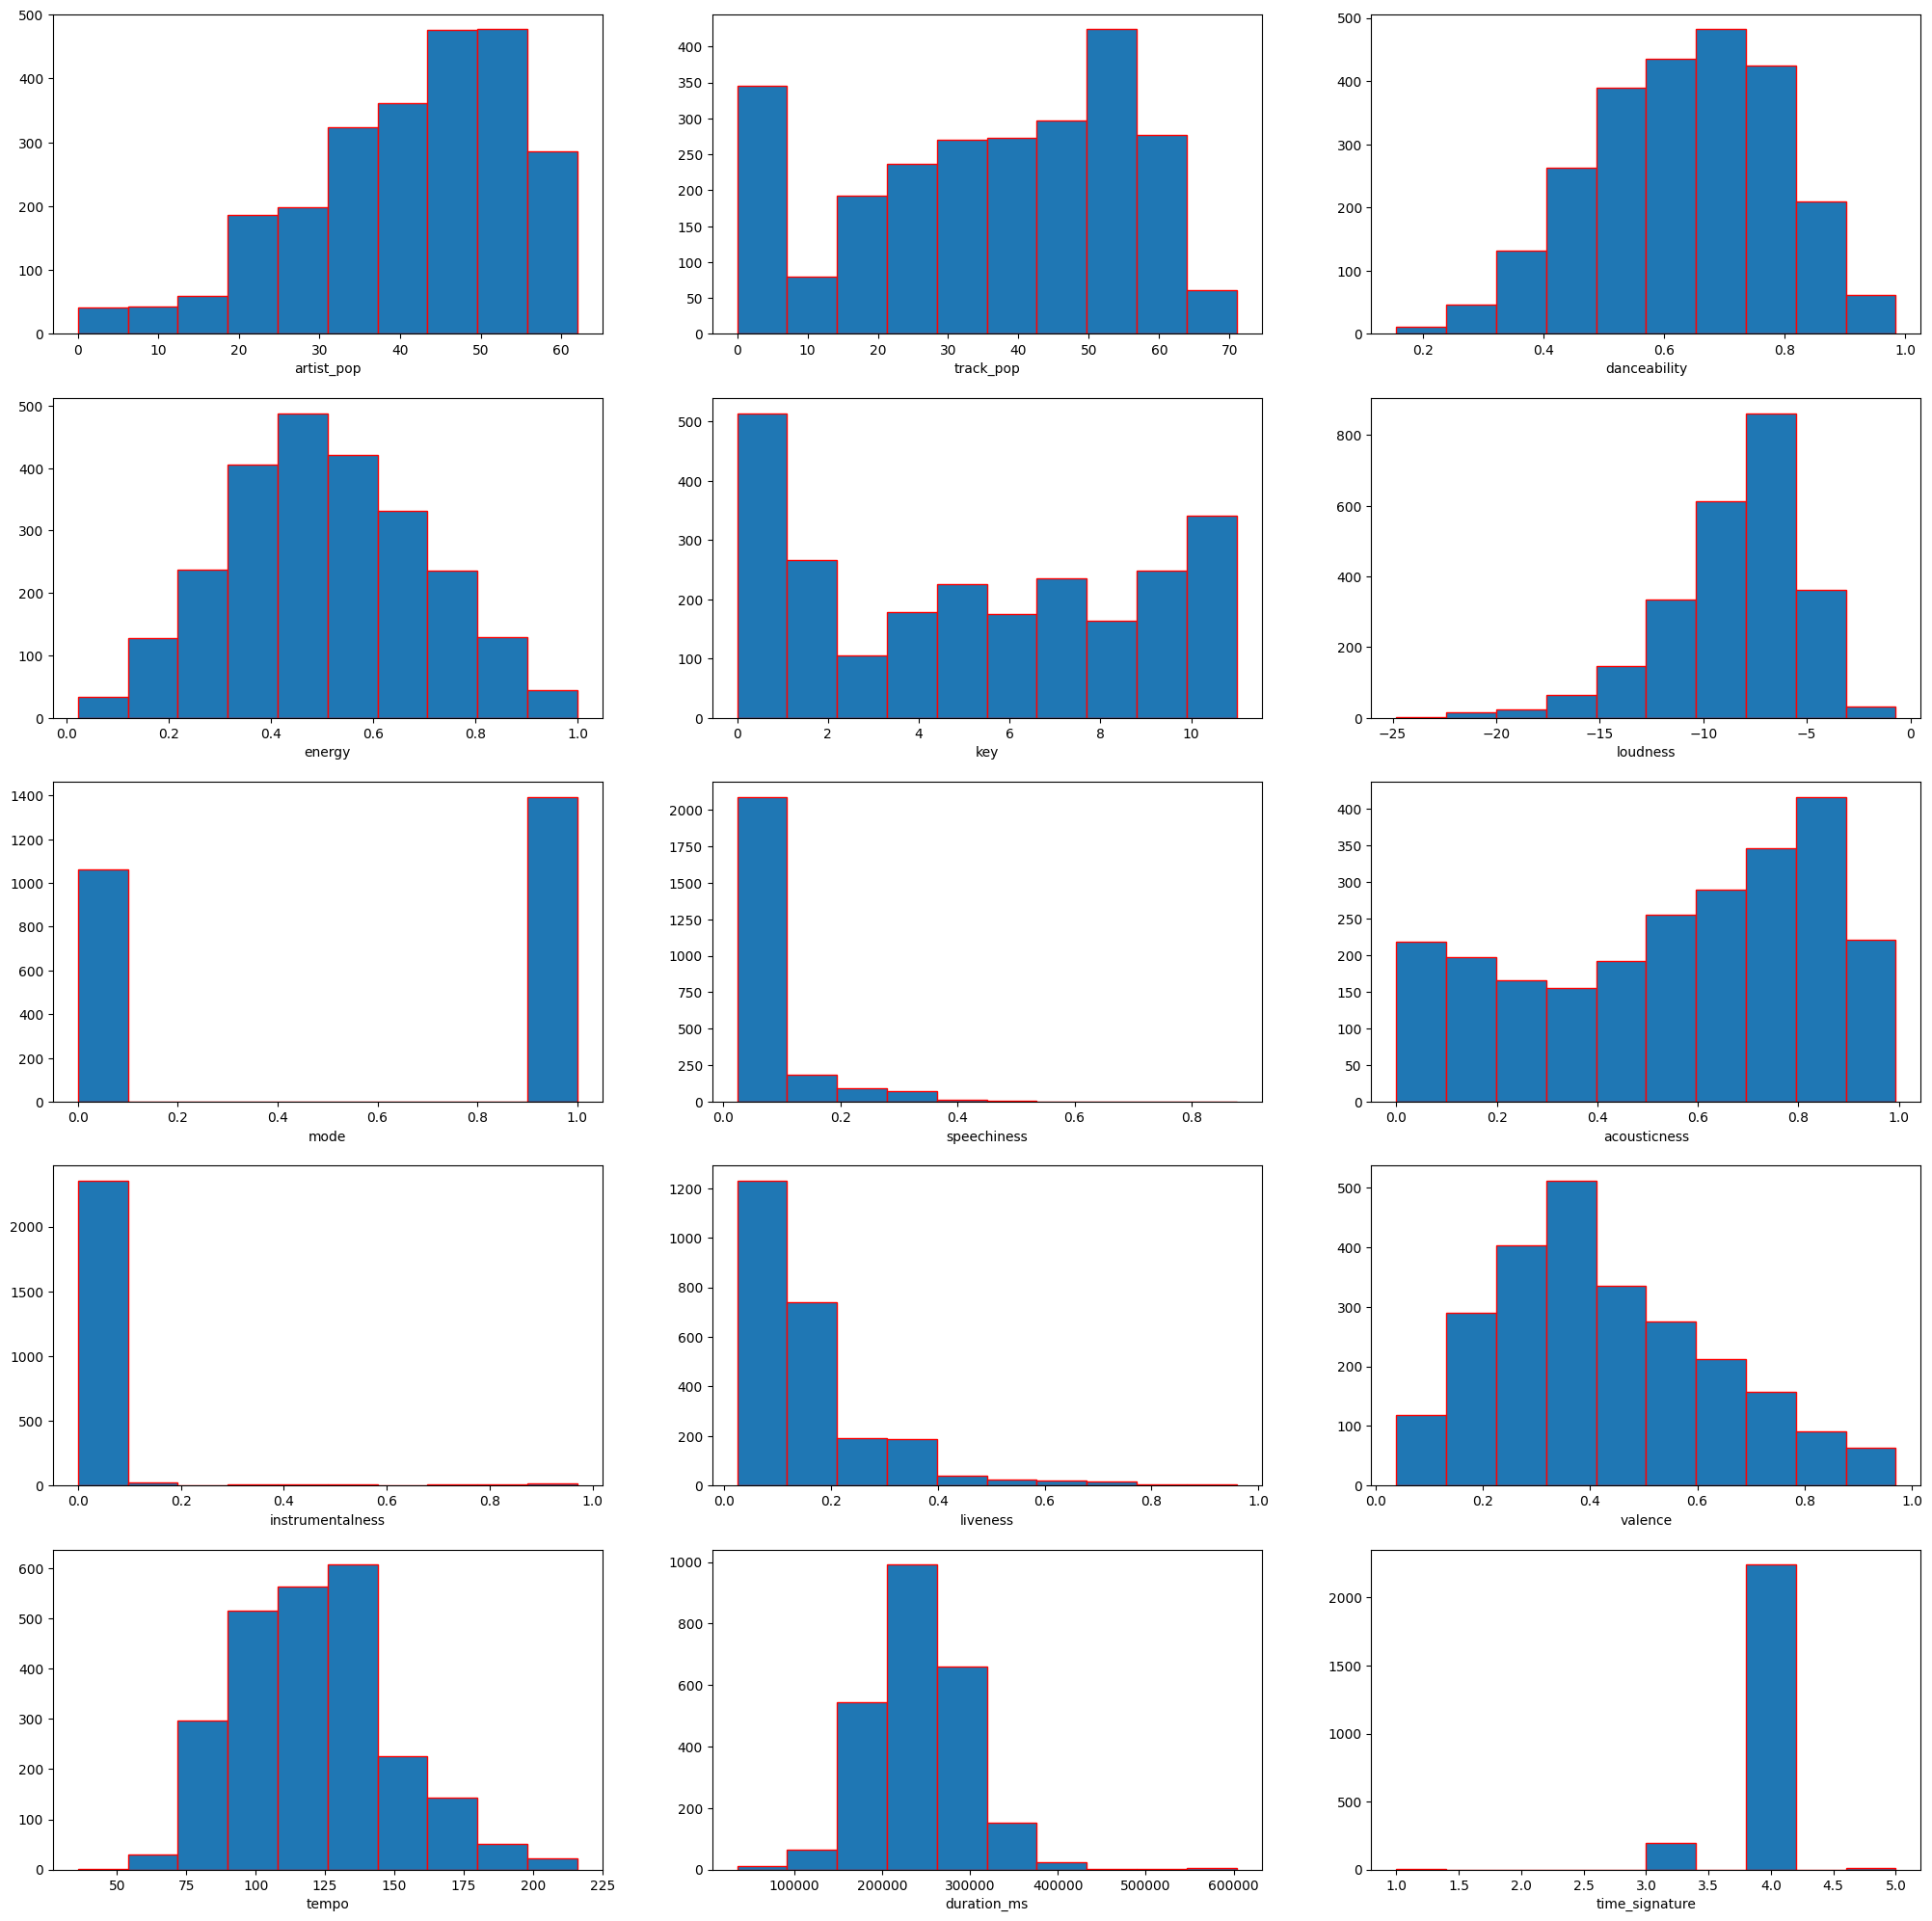

In [ ]:
fig, axs = plt.subplots(nrows=5,
                        ncols=3,
                        figsize=(25, 25))
idx = 0
for i in range(5):
  for j in range(3):
    axs[i, j].hist(x=df[cols[idx]], edgecolor='r')
    axs[i, j].set_xlabel(cols[idx])
    idx+=1

Text(0, 0.5, 'valence')

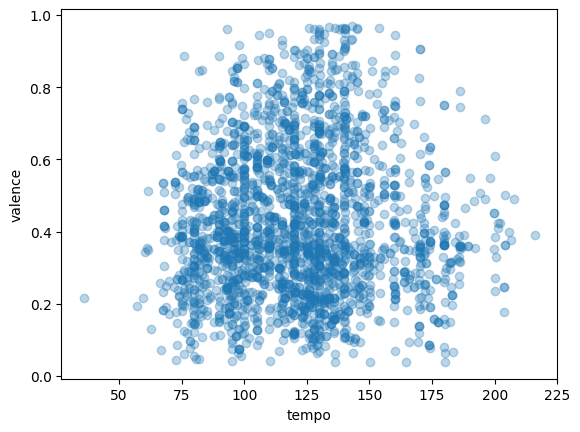

In [ ]:
plt.scatter(data=df,
            x='tempo',
            y='valence',
            alpha=0.3)
plt.xlabel('tempo')
plt.ylabel('valence')

Text(0, 0.5, 'danceability')

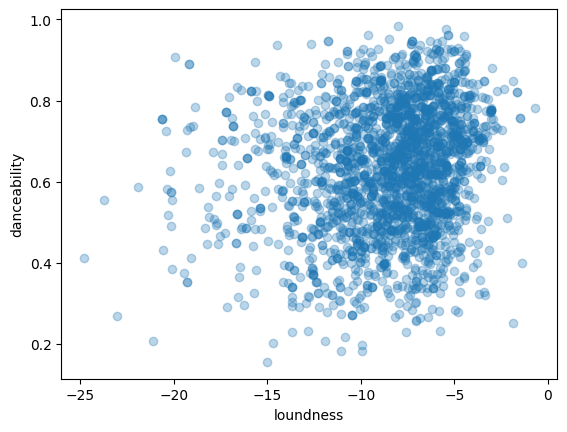

In [ ]:
plt.scatter(data=df,
            x='loudness',
            y='danceability',
            alpha=0.3)
plt.xlabel('loundness')
plt.ylabel('danceability')

* Những bài hát có âm lượng cao -> phù hợp để nhảy

Text(0, 0.5, 'energy')

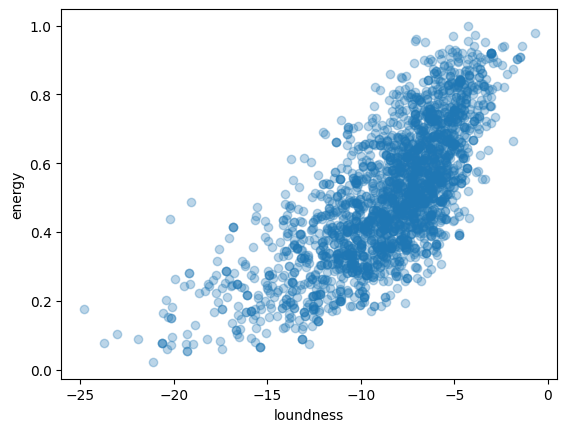

In [ ]:
plt.scatter(data=df,
            x='loudness',
            y='energy',
            alpha=0.3)
plt.xlabel('loundness')
plt.ylabel('energy')

Text(0, 0.5, 'danceability')

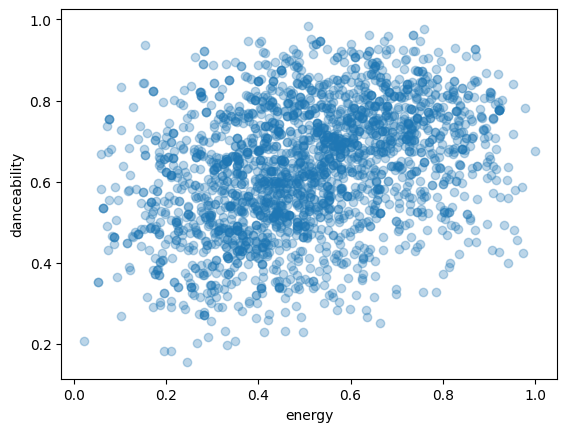

In [ ]:
plt.scatter(data=df,
            x='energy',
            y='danceability',
            alpha=0.3)
plt.xlabel('energy')
plt.ylabel('danceability')

Text(0, 0.5, 'loudness')

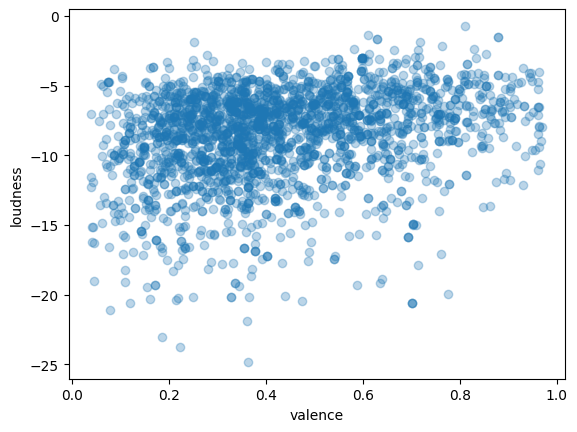

In [ ]:
plt.scatter(data=df,
            x='valence',
            y='loudness',
            alpha=0.3)
plt.xlabel('valence')
plt.ylabel('loudness')

Text(0, 0.5, 'danceability')

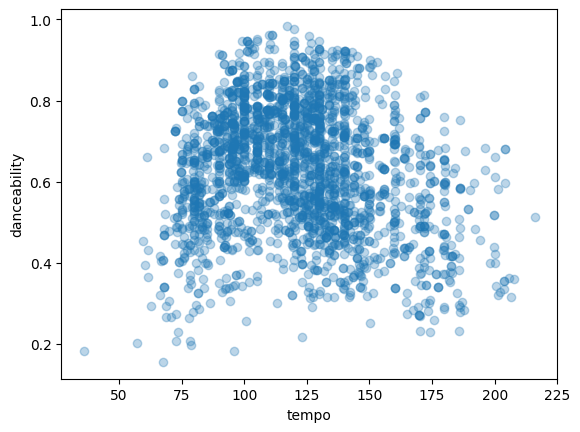

In [ ]:
plt.scatter(data=df,
            x='tempo',
            y='danceability',
            alpha=0.3)
plt.xlabel('tempo')
plt.ylabel('danceability')

<Axes: xlabel='track_pop', ylabel='Count'>

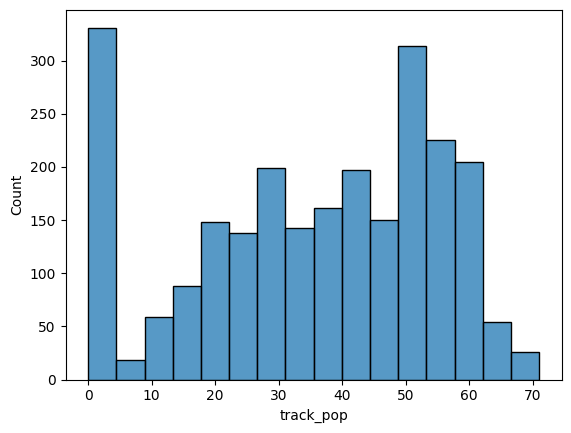

In [ ]:
sn.histplot(data=df,
            x='track_pop')

In [ ]:
popular_track = df.loc[df.track_pop>50]
popular_track.head()

track_uri                   track_name  \
0  spotify:track:3un8UkiPHJjlsrTHQnisXH                    Từng Quen   
1  spotify:track:6KgZf5gZgF1KLNxq1qZgHP       Anh Là Ngoại Lệ Của Em   
2  spotify:track:4acXEYw7ayyJnm9GXDrqiL  Hit Me Up (feat. Nomovodka)   
3  spotify:track:0kHgteR4TV4LO80wrasDSR                      Bạn Đời   
4  spotify:track:08ULi904W2Po6pVj8nN7KC               đưa em về nhàa   

  artist_name  artist_pop                                      artist_genres  \
0  Wren Evans          54  ['v-pop', 'vietnamese hip hop', 'vietnamese me...   
1   Phương Ly          54                                          ['v-pop']   
2        Binz          54                    ['v-pop', 'vietnamese hip hop']   
3       Karik          52                    ['v-pop', 'vietnamese hip hop']   
4      GREY D          58                                          ['v-pop']   

                         album  track_pop  danceability  energy  key  ...  \
0                    Từng Quen         71         0.758   0.246    7  ...   
1       Anh Là Ngoại Lệ Của Em         70         0.844   0.677    6  ...   
2  Hit Me Up (feat. Nomovodka)         70         0.775   0.440    9  ...   
3                      Bạn Đời         71         0.843   0.484    5  ...   
4               đưa em về nhàa         67         0.664   0.531    3  ...   

   mainland se asia metal  vietnamese bolero  indie viet  vietnamese trap  \
0                       0                  0           0                0   
1                       0                  0           0                0   
2                       0                  0           0                0   
3                       0                  0           0                0   
4                       0                  0           0                0   

   vietnamese hip hop  viet remix  viet lo-fi  viet instrumental  \
0                   1           0           0                  0   
1                   0           0           0                  0   
2                   1           0           0                  0   
3                   1           0           0                  0   
4                   0           0           0                  0   

  v-pop and vietnamese pop  year  
0                        1  2023  
1                        1  2023  
2                        1  2023  
3                        1  2023  
4                        1  2023  

[5 rows x 42 columns]

In [ ]:
rock_viet = df.loc[df['rock viet']==1]
fig, axs = plt.subplots(nrows=5,
                        ncols=3,
                        figsize=(20, 20))
idx = 0
for i in range(5):
  for j in range(3):
    axs[i, j].hist(x=rock_viet[cols[idx]], edgecolor='r')
    axs[i, j].set_xlabel(cols[idx])
    idx+=1

In [ ]:
cols

['artist_pop',
 'track_pop',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [ ]:
find_num_ft(df, cols, target='track_pop')

['artist_pop', 'track_pop']

In [ ]:
timBienAnhHuong(df, cols)

['track_pop']

In [ ]:
temp = df.copy()
df_2 = temp.drop(temp.loc[temp.track_pop==0].index)
df_2.head()

track_uri                   track_name  \
0  spotify:track:3un8UkiPHJjlsrTHQnisXH                    Từng Quen   
1  spotify:track:6KgZf5gZgF1KLNxq1qZgHP       Anh Là Ngoại Lệ Của Em   
2  spotify:track:4acXEYw7ayyJnm9GXDrqiL  Hit Me Up (feat. Nomovodka)   
3  spotify:track:0kHgteR4TV4LO80wrasDSR                      Bạn Đời   
4  spotify:track:08ULi904W2Po6pVj8nN7KC               đưa em về nhàa   

  artist_name  artist_pop                                      artist_genres  \
0  Wren Evans          54  ['v-pop', 'vietnamese hip hop', 'vietnamese me...   
1   Phương Ly          54                                          ['v-pop']   
2        Binz          54                    ['v-pop', 'vietnamese hip hop']   
3       Karik          52                    ['v-pop', 'vietnamese hip hop']   
4      GREY D          58                                          ['v-pop']   

                         album  track_pop  danceability  energy  key  ...  \
0                    Từng Quen         71         0.758   0.246    7  ...   
1       Anh Là Ngoại Lệ Của Em         70         0.844   0.677    6  ...   
2  Hit Me Up (feat. Nomovodka)         70         0.775   0.440    9  ...   
3                      Bạn Đời         71         0.843   0.484    5  ...   
4               đưa em về nhàa         67         0.664   0.531    3  ...   

   mainland se asia metal  vietnamese bolero  indie viet  vietnamese trap  \
0                       0                  0           0                0   
1                       0                  0           0                0   
2                       0                  0           0                0   
3                       0                  0           0                0   
4                       0                  0           0                0   

   vietnamese hip hop  viet remix  viet lo-fi  viet instrumental  \
0                   1           0           0                  0   
1                   0           0           0                  0   
2                   1           0           0                  0   
3                   1           0           0                  0   
4                   0           0           0                  0   

  v-pop and vietnamese pop  year  
0                        1  2023  
1                        1  2023  
2                        1  2023  
3                        1  2023  
4                        1  2023  

[5 rows x 42 columns]

In [ ]:
timBienAnhHuong(df_2, cols)

['artist_pop', 'track_pop']

In [ ]:
len(cols)

15

IndexError: ignored

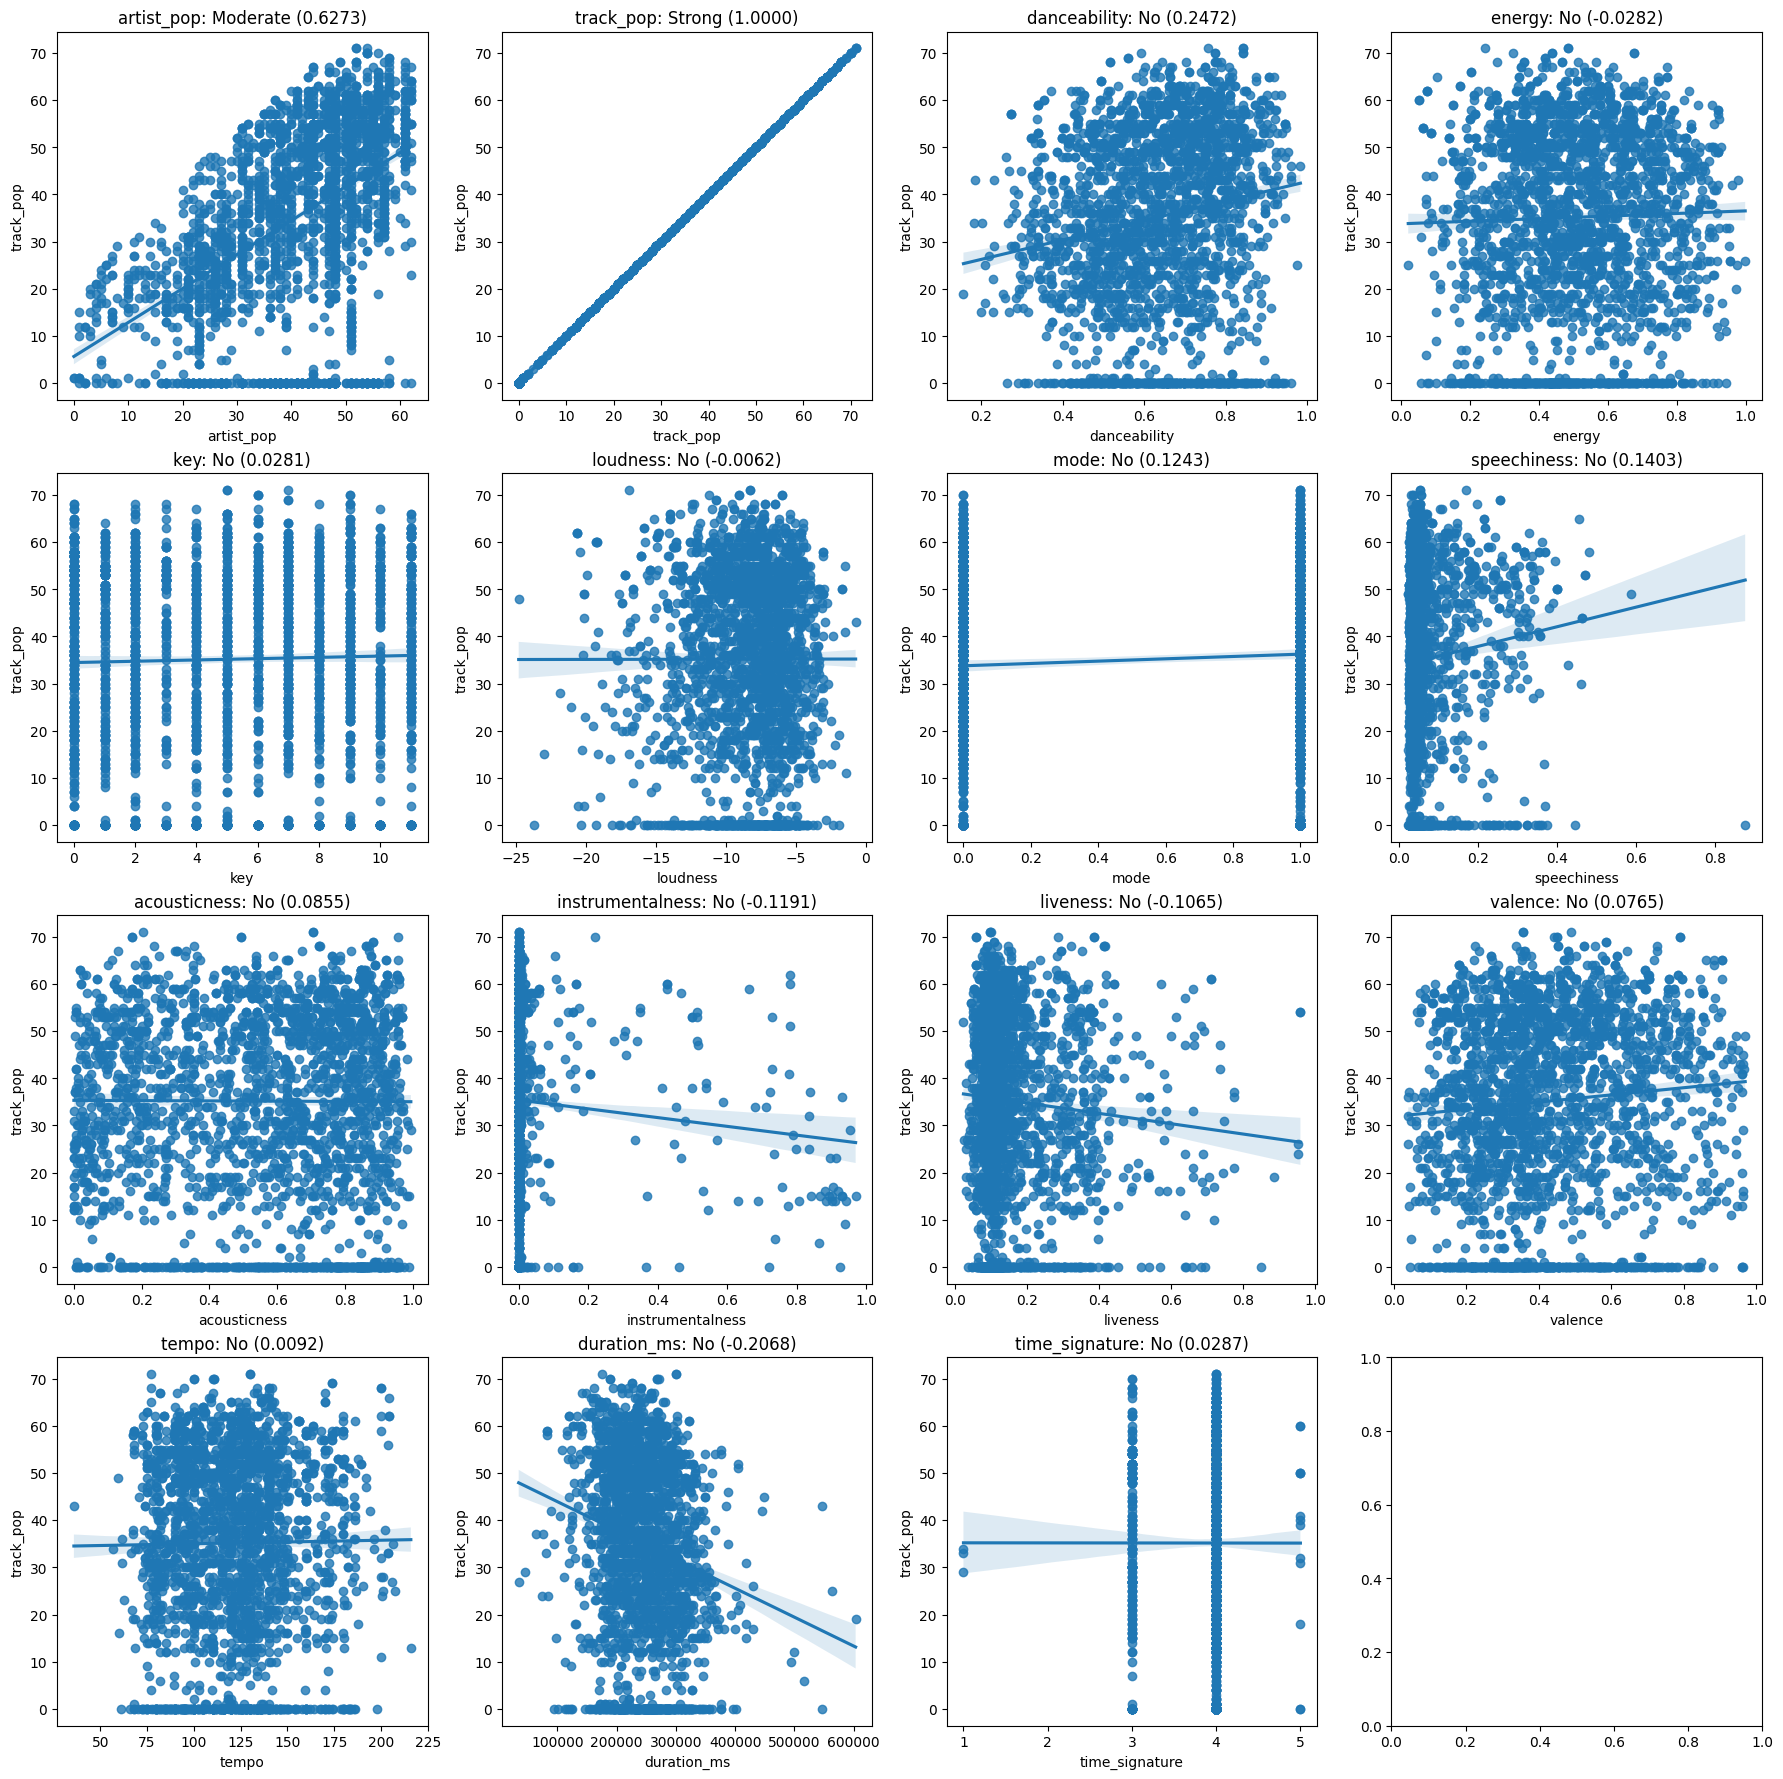

In [ ]:
fig, axes = plt.subplots(4, 4,figsize=(22,22))
idx = 0
for i in range(4):
  for j in range(4):
    Pearson_coef, affection = find_p_value(df_2, cols[idx])
    ax = axes[i, j]
    ax.set_title(f'{cols[idx]}: {affection} ({Pearson_coef:.4f})')
    sn.regplot(data=df, x=cols[idx], y='track_pop', ax=ax)
    idx+=1

<ipython-input-73-922047960c86>:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  genres['Total'] = df.sum(axis=0)


<Axes: >

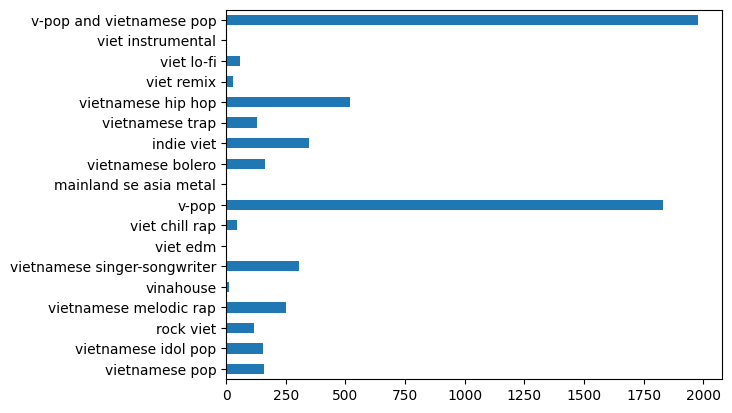

In [ ]:
genres = df[cols_].T
genres['Total'] = df.sum(axis=0)
genres['Total'].plot(kind='barh')

In [ ]:
df['rock viet'].value_counts()

0    2339
1     117
Name: rock viet, dtype: int64

In [ ]:
genres.index

Index(['vietnamese pop', 'vietnamese idol pop', 'rock viet',
       'vietnamese melodic rap', 'vinahouse', 'vietnamese singer-songwriter',
       'viet edm', 'viet chill rap', 'v-pop', 'mainland se asia metal',
       'vietnamese bolero', 'indie viet', 'vietnamese trap',
       'vietnamese hip hop', 'viet remix', 'viet lo-fi', 'viet instrumental',
       'v-pop and vietnamese pop'],
      dtype='object')

In [ ]:
np.ceil(((df['vietnamese pop'] + df['vietnamese singer-songwriter'] + df['vietnamese idol pop'] + df['v-pop'] + df['v-pop and vietnamese pop'])/5).values)
np.ceil(((df['vietnamese melodic rap'] + df['viet chill rap'])/2).values)

array([1., 1., 1., ..., 1., 1., 1.])

# **EDA 2**

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_uri', 'track_name', 'artist_name', 'artist_pop',
       'artist_genres', 'album', 'track_pop', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'duration_ms', 'time_signature',
       'date', 'checked_date', 'rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'year', 'v_pop', 'v_rap'],
      dtype='object')

## **Genres**

<Axes: >

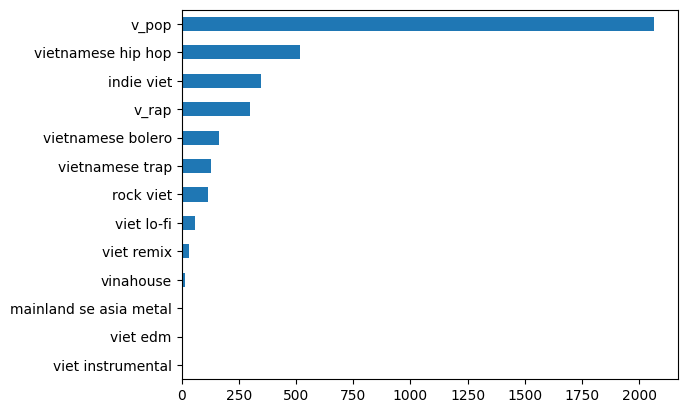

In [ ]:
cols = ['rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'v_pop', 'v_rap']
genres = df[cols].T
genres['Total'] = genres.sum(axis=1)
genres.sort_values(by='Total', inplace=True)
genres['Total'].plot(kind='barh')

## **Year**

<Axes: ylabel='Frequency'>

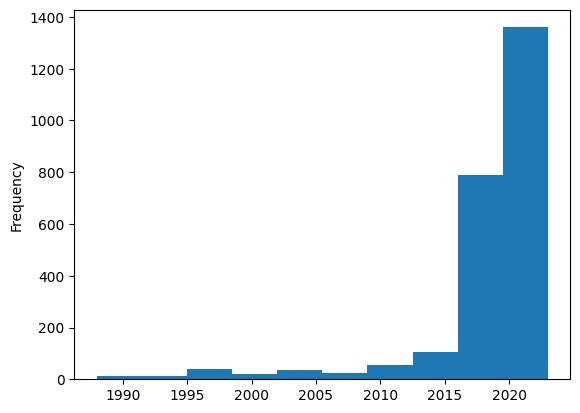

In [ ]:
df.year.plot(kind='hist',
             bins = 10)

# **Interaction Between track_pop and other features**

In [ ]:
cols = list(df.select_dtypes(include=np.number).drop(['year','v_pop',
 'rock viet',
 'v_rap',
 'vinahouse',
 'viet edm',
 'mainland se asia metal',
 'vietnamese bolero',
 'indie viet',
 'vietnamese trap',
 'vietnamese hip hop',
 'viet remix',
 'viet lo-fi',
 'viet instrumental'],axis=1).columns)
cols

['Unnamed: 0',
 'artist_pop',
 'track_pop',
 'danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'count']

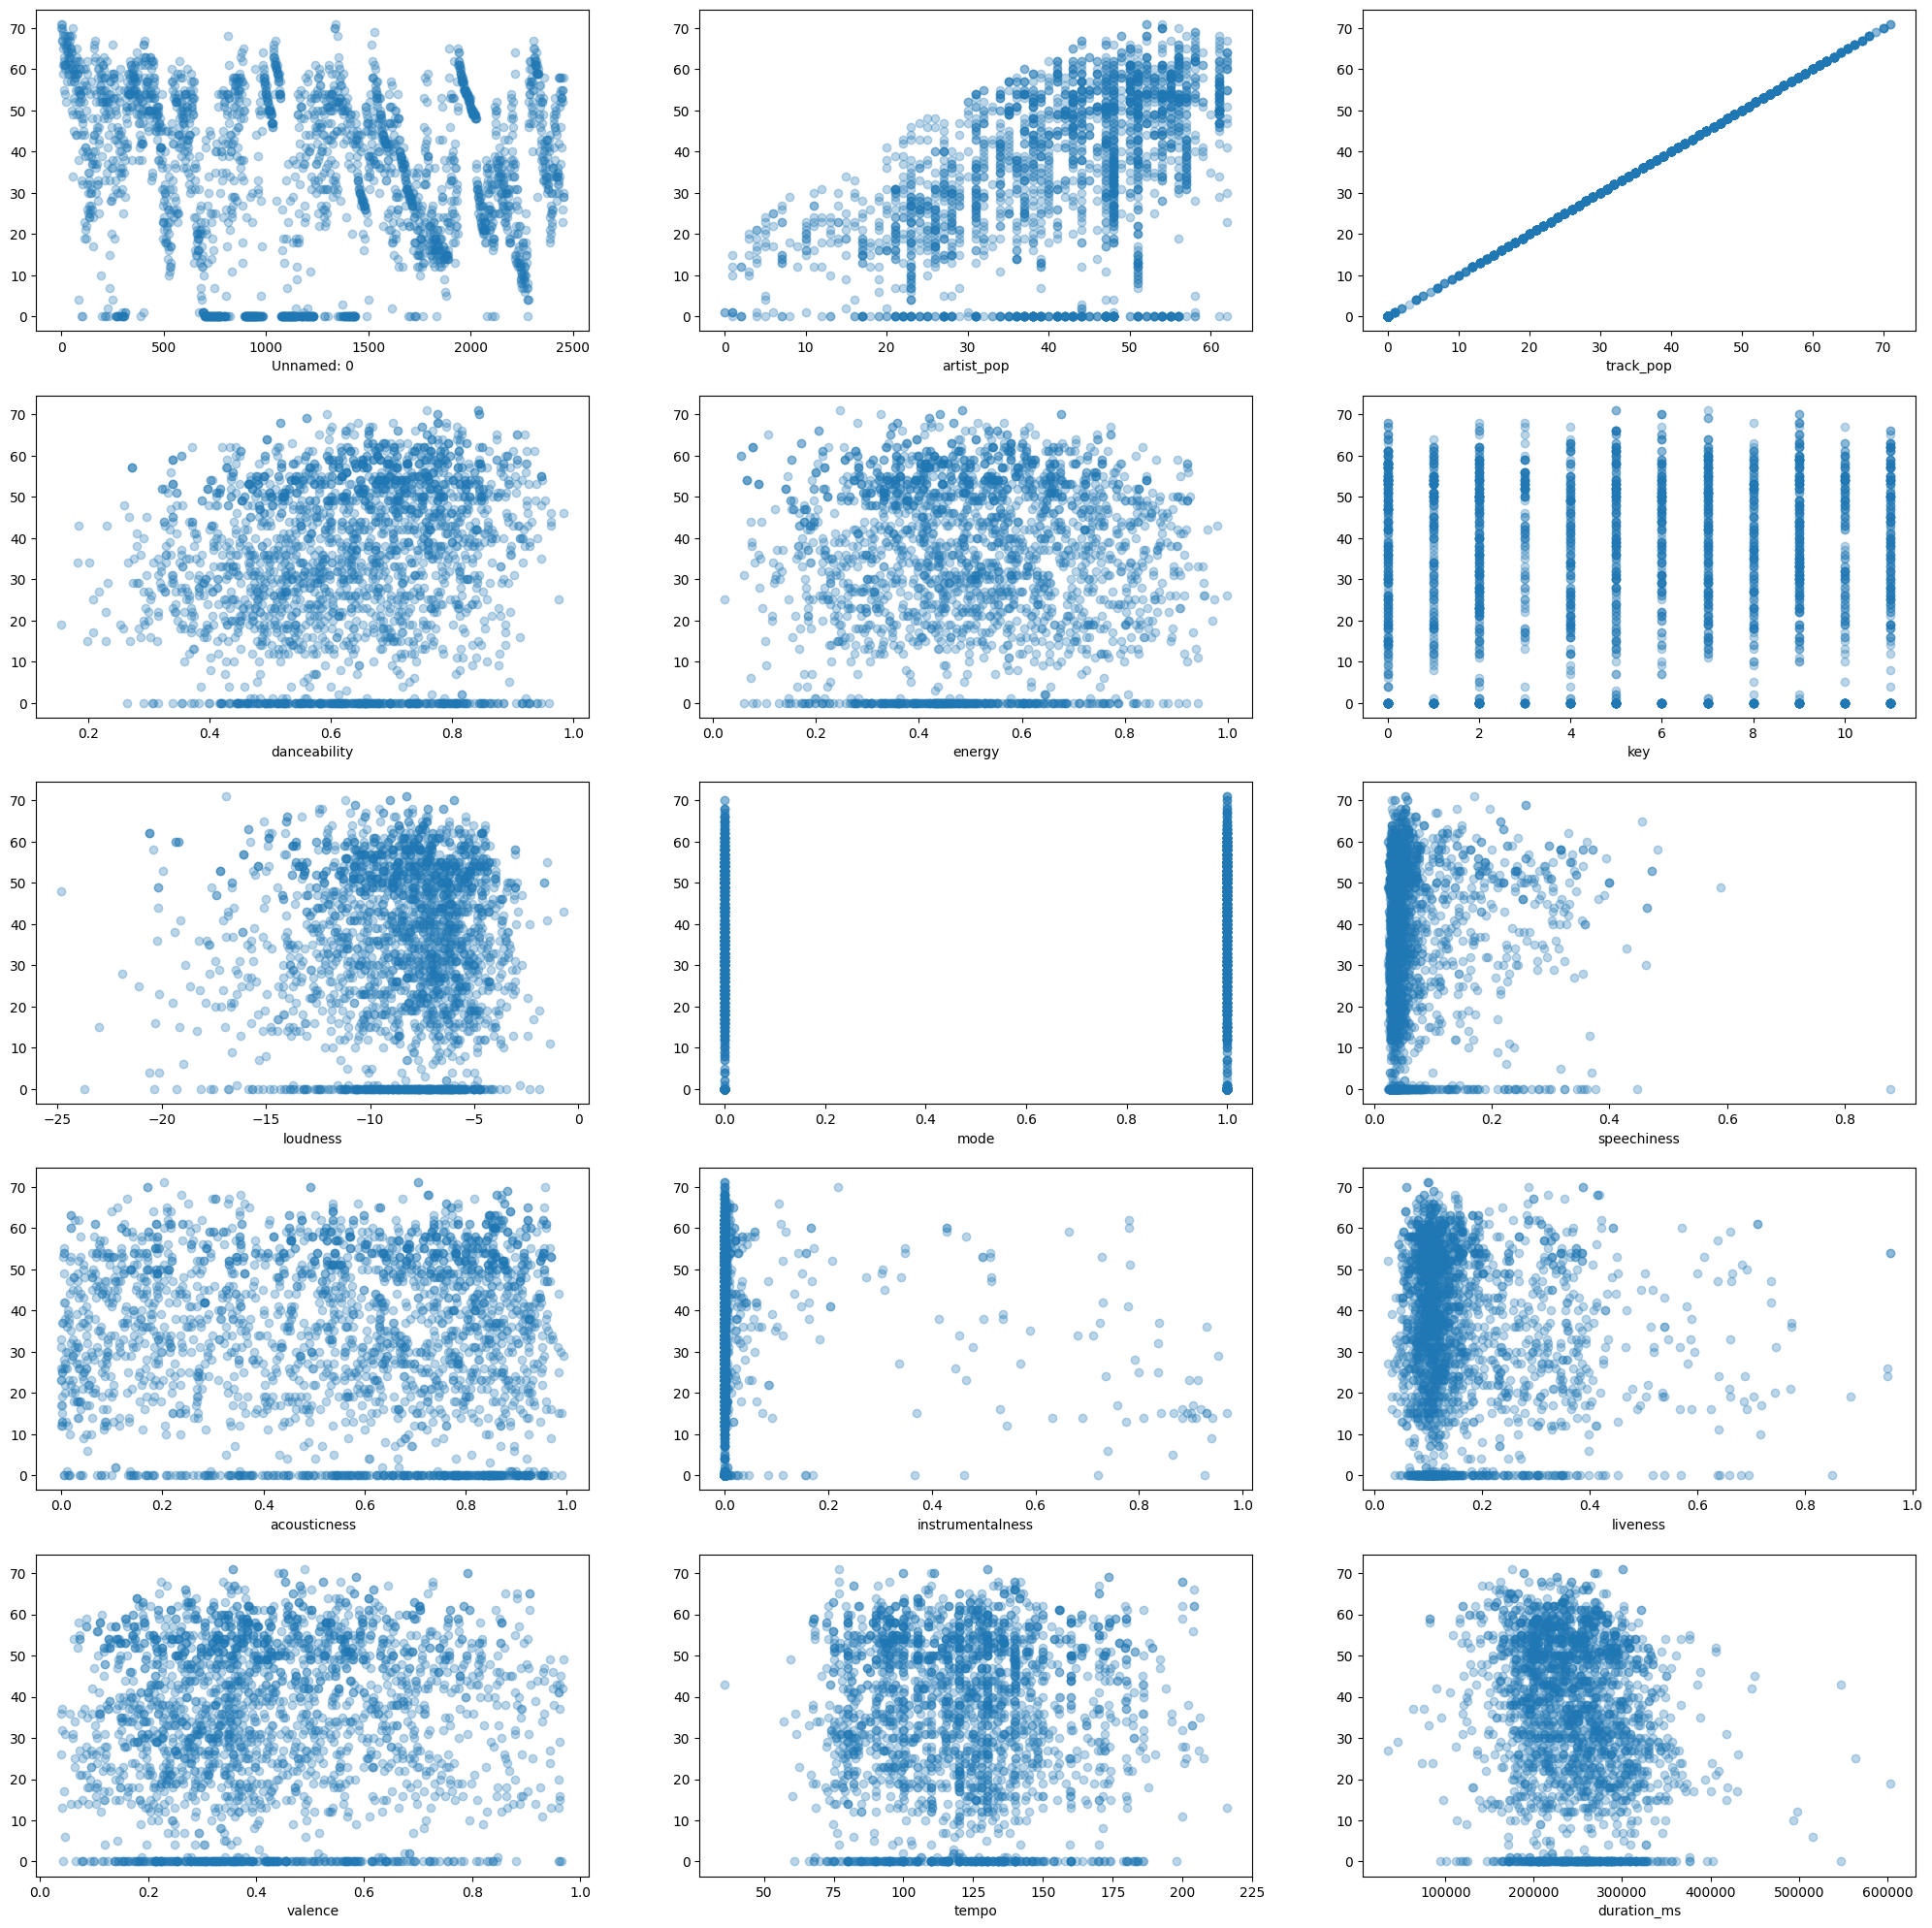

In [ ]:
fig, axs = plt.subplots(nrows=5,
                        ncols=3,
                        figsize=(25, 25))
idx = 0
for i in range(5):
  for j in range(3):
    axs[i, j].scatter(x=df[cols[idx]], y=df.track_pop, alpha=0.3)
    axs[i, j].set_xlabel(cols[idx])
    idx+=1

# **Value Range**

In [ ]:
cols = ['artist_pop',
 'track_pop',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']
len(cols)

12

In [ ]:
fig, axs = plt.subplots(nrows=4,
                        ncols=3,
                        figsize=(25, 25))
idx = 0
for i in range(4):
  for j in range(3):
    sn.histplot(x=df[cols[idx]], ax=axs[i, j])
    axs[i, j].set_xlabel(cols[idx])
    idx+=1

# **Year**

<Axes: ylabel='Frequency'>

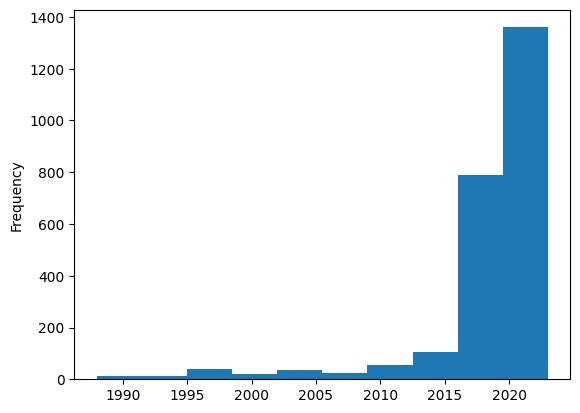

In [ ]:
df.year.plot(kind='hist')

# **Genres Distribution**

In [ ]:
df.loc[df.track_pop > 50]

Unnamed: 0                             track_uri  \
0              0  spotify:track:3un8UkiPHJjlsrTHQnisXH   
1              1  spotify:track:6KgZf5gZgF1KLNxq1qZgHP   
2              2  spotify:track:4acXEYw7ayyJnm9GXDrqiL   
3              3  spotify:track:0kHgteR4TV4LO80wrasDSR   
4              4  spotify:track:08ULi904W2Po6pVj8nN7KC   
...          ...                                   ...   
2445        2445  spotify:track:11OxuU5y7ebAJyKaY8dOl0   
2448        2448  spotify:track:1VBJ2QBJjgbcGgsXJbHslR   
2449        2449  spotify:track:0ReId5SRMspb6ISw0rBsBN   
2451        2451  spotify:track:7vAUaVWs9GmNJ6gg8H7FEm   
2455        2455  spotify:track:3bZGGKrMQLDGg18y2QqKFF   

                          track_name        artist_name  artist_pop  \
0                          Từng Quen         Wren Evans          54   
1             Anh Là Ngoại Lệ Của Em          Phương Ly          54   
2        Hit Me Up (feat. Nomovodka)               Binz          54   
3                            Bạn Đời              Karik          52   
4                     đưa em về nhàa             GREY D          58   
...                              ...                ...         ...   
2445  Lý Do Nào Để Quay Lại Với Nhau             PAR SG          39   
2448                            CLME  Andree Right Hand          50   
2449                             CUA              MANBO          46   
2451           Tháng Mấy Em Nhớ Anh?        Hà Anh Tuấn          43   
2455                        See Tình    Hoàng Thùy Linh          51   

                                          artist_genres  \
0     ['v-pop', 'vietnamese hip hop', 'vietnamese me...   
1                                             ['v-pop']   
2                       ['v-pop', 'vietnamese hip hop']   
3                       ['v-pop', 'vietnamese hip hop']   
4                                             ['v-pop']   
...                                                 ...   
2445                             ['vietnamese hip hop']   
2448          ['vietnamese hip hop', 'vietnamese trap']   
2449                    ['v-pop', 'vietnamese hip hop']   
2451                                          ['v-pop']   
2455                                          ['v-pop']   

                               album  track_pop  danceability  energy  ...  \
0                          Từng Quen         71         0.758   0.246  ...   
1             Anh Là Ngoại Lệ Của Em         70         0.844   0.677  ...   
2        Hit Me Up (feat. Nomovodka)         70         0.775   0.440  ...   
3                            Bạn Đời         71         0.843   0.484  ...   
4                     đưa em về nhàa         67         0.664   0.531  ...   
...                              ...        ...           ...     ...  ...   
2445  Lý Do Nào Để Quay Lại Với Nhau         58         0.724   0.469  ...   
2448                            CLME         55         0.756   0.744  ...   
2449                             CUA         55         0.947   0.533  ...   
2451           Tháng Mấy Em Nhớ Anh?         52         0.720   0.215  ...   
2455                        See Tình         58         0.846   0.755  ...   

      vietnamese bolero  indie viet  vietnamese trap  vietnamese hip hop  \
0                     0           0                0                   1   
1                     0           0                0                   0   
2                     0           0                0                   1   
3                     0           0                0                   1   
4                     0           0                0                   0   
...                 ...         ...              ...                 ...   
2445                  0           0                0                   1   
2448                  0           0                1                   1   
2449                  0           0                0                   1   
2451                  0           0               

<Axes: xlabel='count', ylabel='count'>

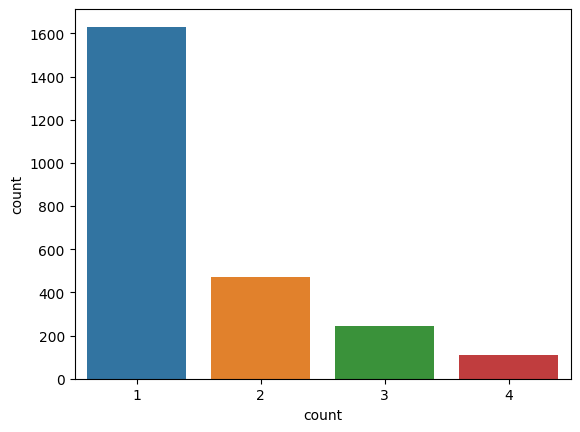

In [ ]:
cols = ['rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'v_pop', 'v_rap']
df['count'] = df[cols].sum(axis=1)
df['count'] = df['count'].astype(int)
sn.countplot(data=df, x='count')

# **Interaction**

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_uri', 'track_name', 'artist_name', 'artist_pop',
       'artist_genres', 'album', 'track_pop', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'duration_ms', 'time_signature',
       'date', 'checked_date', 'rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'year', 'v_pop', 'v_rap', 'count'],
      dtype='object')

In [ ]:
df['key'] = df['key'].astype(str)

## **Danceability**

              danceability    energy
danceability      1.000000  0.353422
energy            0.353422  1.000000


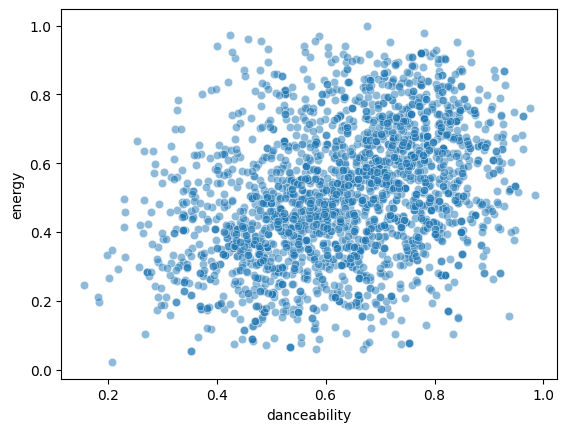

In [ ]:
sn.scatterplot(data=df,
               x='danceability',
               y='energy',
               alpha=0.5)
print(df[['danceability', 'energy']].corr())

              danceability  loudness
danceability      1.000000  0.159655
loudness          0.159655  1.000000


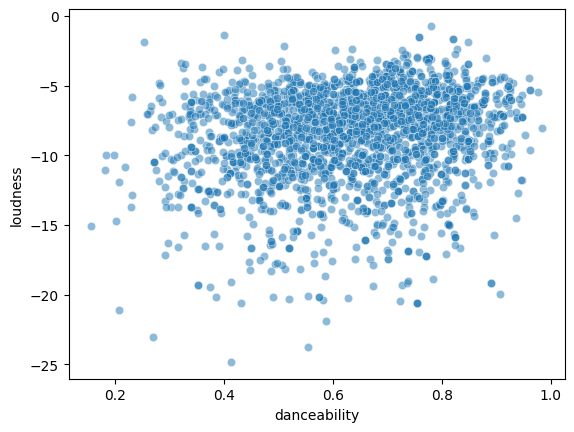

In [ ]:
sn.scatterplot(data=df,
               x='danceability',
               y='loudness',
               alpha=0.5)
print(df[['danceability', 'loudness']].corr())

              danceability     tempo
danceability      1.000000 -0.159866
tempo            -0.159866  1.000000


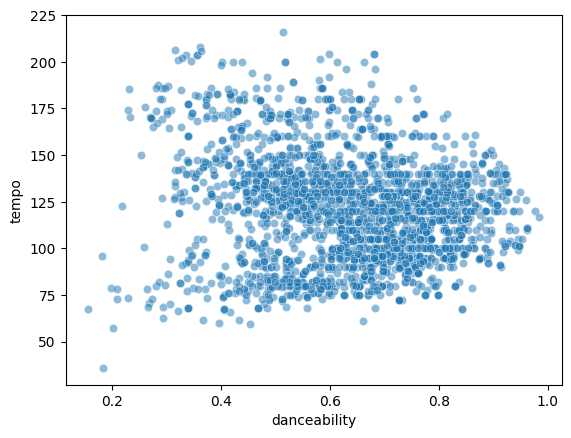

In [ ]:
sn.scatterplot(data=df,
               x='danceability',
               y='tempo',
               alpha=0.5)
print(df[['danceability', 'tempo']].corr())

<Axes: xlabel='danceability', ylabel='speechiness'>

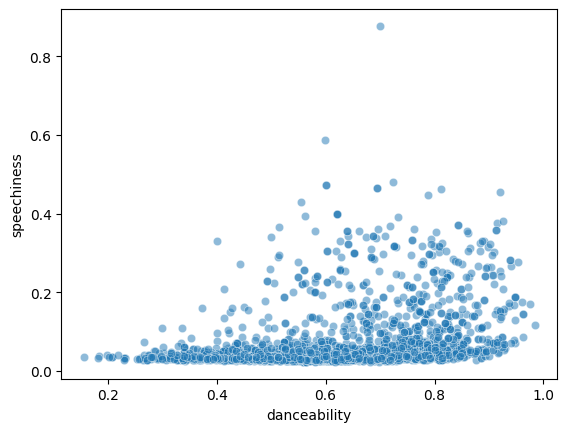

In [ ]:
sn.scatterplot(data=df,
               x='danceability',
               y='speechiness',
               alpha=0.5)

## **Key**

<Axes: xlabel='key', ylabel='danceability'>

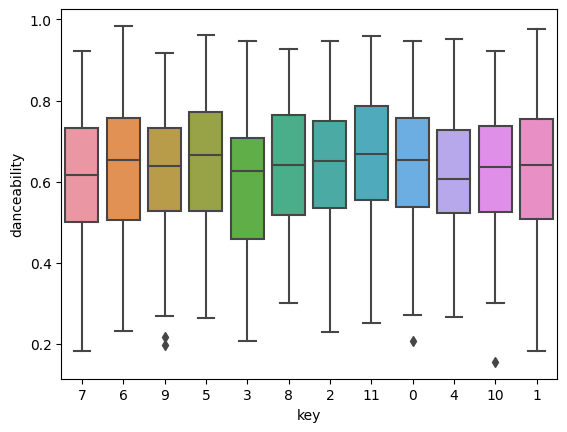

In [ ]:
sn.boxplot(data=df,
           y='danceability',
           x='key')

<Axes: xlabel='mode', ylabel='danceability'>

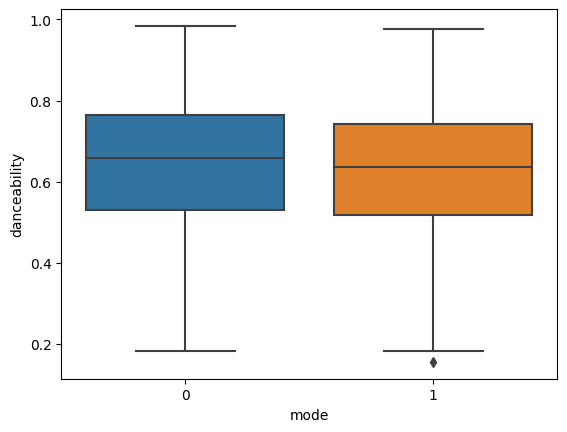

In [ ]:
sn.boxplot(data=df,
           y='danceability',
           x='mode')

<Axes: xlabel='key', ylabel='tempo'>

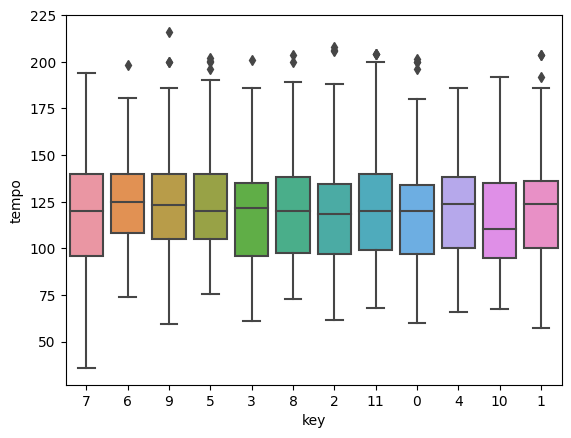

In [ ]:
sn.boxplot(data=df,
           y='tempo',
           x='key')

<Axes: xlabel='key', ylabel='valence'>

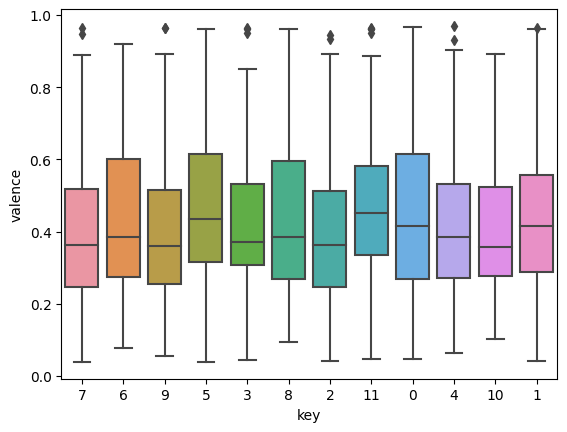

In [ ]:
sn.boxplot(data=df,
           y='valence',
           x='key')

<Axes: xlabel='key', ylabel='track_pop'>

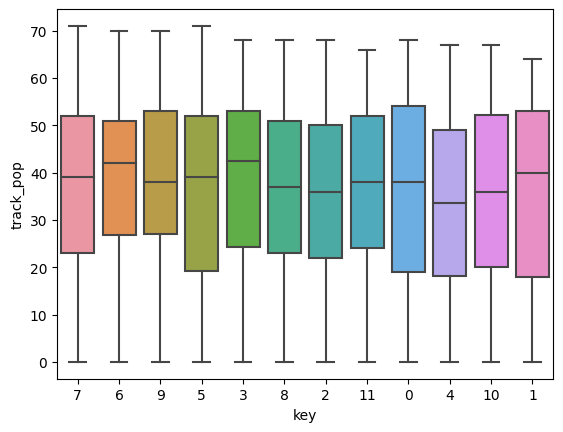

In [ ]:
sn.boxplot(data=df,
           y='track_pop',
           x='key')

<Axes: xlabel='key', ylabel='loudness'>

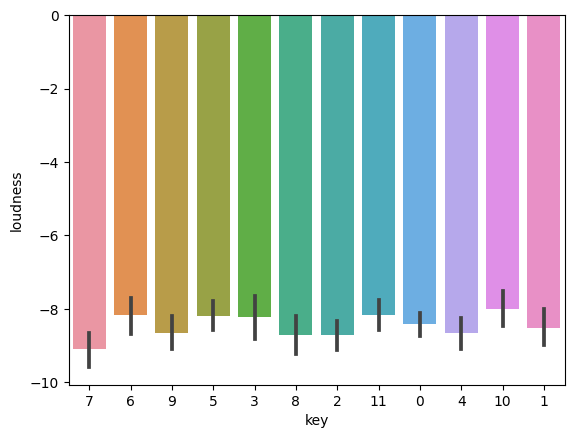

In [ ]:
sn.barplot(data=df,
           y='loudness',
           x='key')

<Axes: xlabel='key', ylabel='energy'>

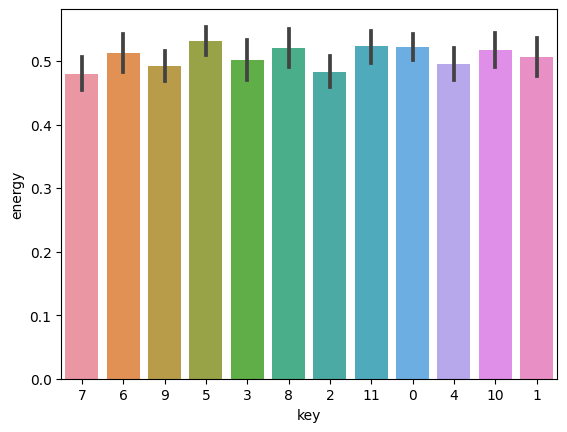

In [ ]:
sn.barplot(data=df,
           y='energy',
           x='key')

<Axes: xlabel='key', ylabel='speechiness'>

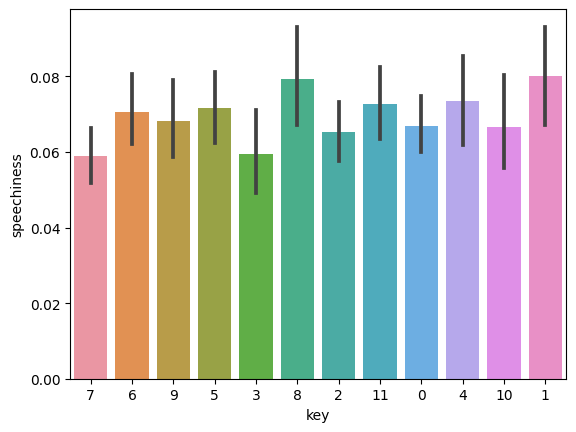

In [ ]:
sn.barplot(data=df,
           y='speechiness',
           x='key')

# **track_pop**

<Axes: ylabel='Frequency'>

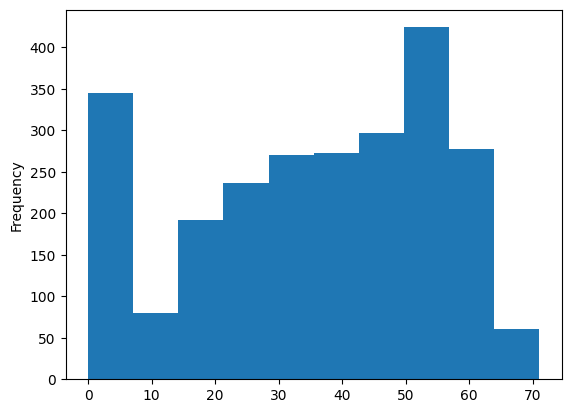

In [ ]:
df.track_pop.plot(kind='hist')

In [ ]:
high_pop = df.loc[df['track_pop']>55]
med_pop = df.loc[(df['track_pop']<=55) | (df['track_pop']>30)]
low_pop = df.loc[df.track_pop <= 30]

In [ ]:
high_pop.columns

Index(['Unnamed: 0', 'track_uri', 'track_name', 'artist_name', 'artist_pop',
       'artist_genres', 'album', 'track_pop', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'duration_ms', 'time_signature',
       'date', 'checked_date', 'rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'year', 'v_pop', 'v_rap'],
      dtype='object')

In [ ]:
bins = np.linspace(min(df.track_pop), max(df.track_pop), 4)

In [ ]:
group_name=['Low', 'Medium', "High"]
df['track_pop_bin'] = pd.cut(df['track_pop'],
                            bins,
                            labels=group_name,
                            include_lowest=True)

In [ ]:
import plotly.express as px
fig = px.treemap(df.groupby(['artist_name', 'track_name']).track_pop.mean().sort_values(ascending=False).reset_index()[:100],
                 path=['artist_name', 'track_name'],
                 values='track_pop',
                 title="Artists"
                )
fig.show()

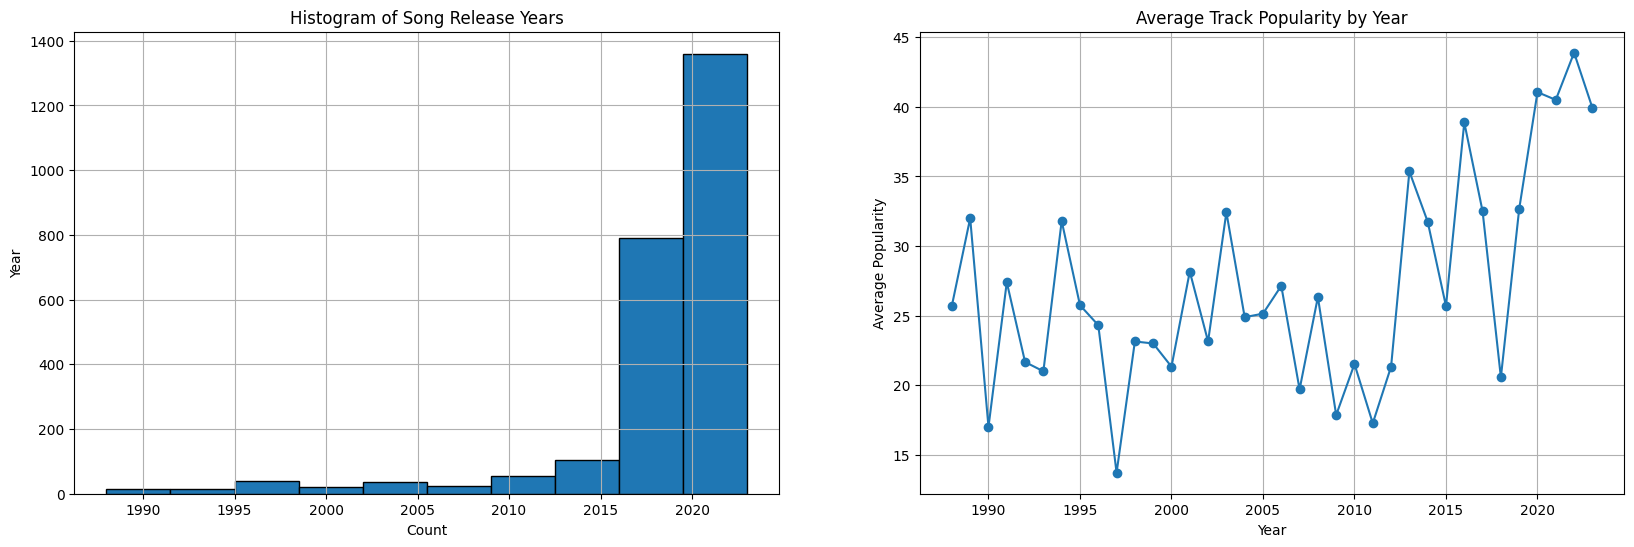

In [ ]:
fig, axes = plt.subplots(nrows=1,
                         ncols=2,
                         figsize=(20, 6),)
axes[0].hist(data=df,
             x='year',
             edgecolor='black')
axes[0].set_title('Histogram of Song Release Years')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Year')
axes[0].grid()

average_popularity_by_year = df.groupby('year')['track_pop'].mean()
axes[1].plot(average_popularity_by_year.index,
             average_popularity_by_year.values,
             marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Popularity')
axes[1].set_title('Average Track Popularity by Year')
axes[1].grid()


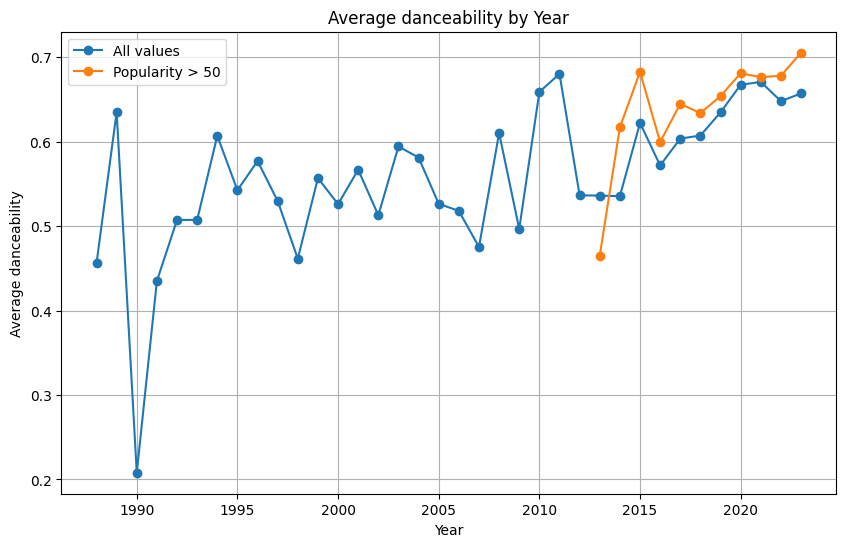

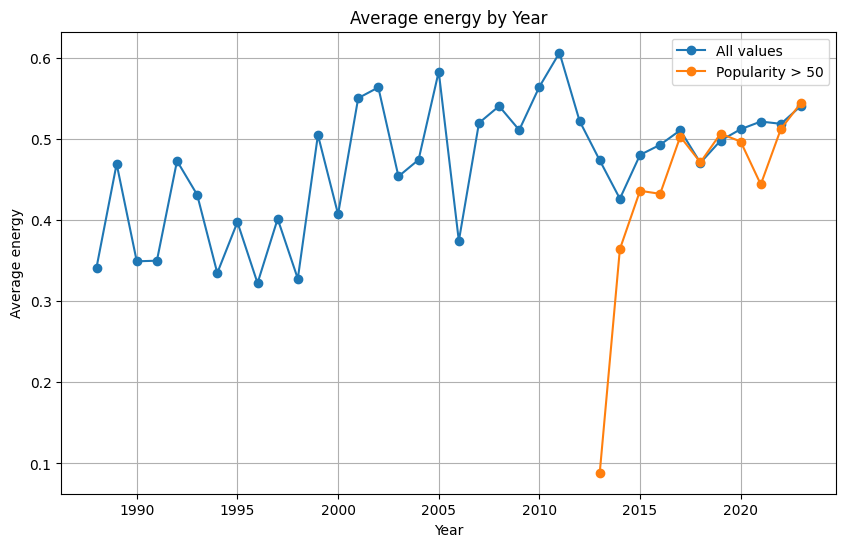

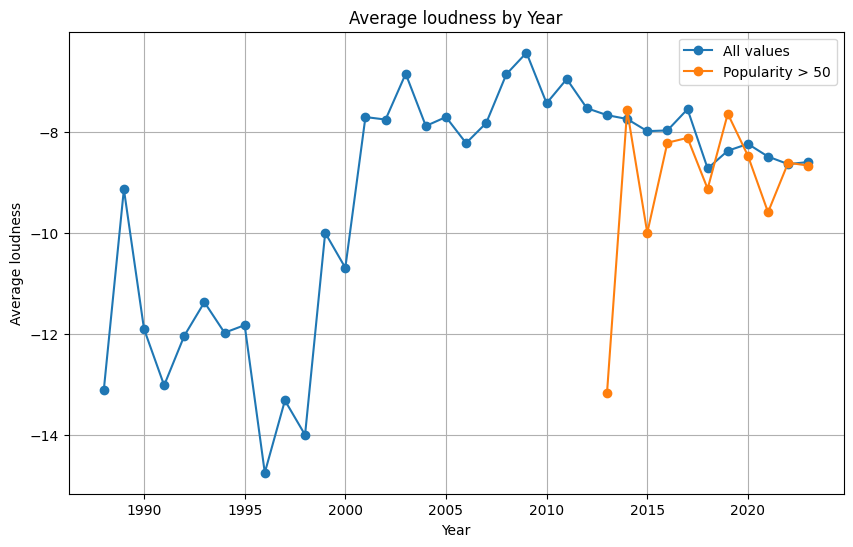

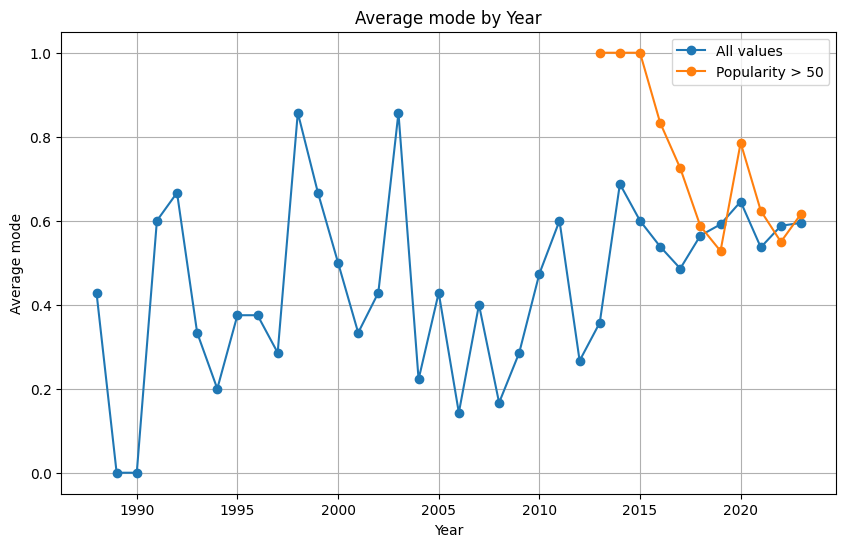

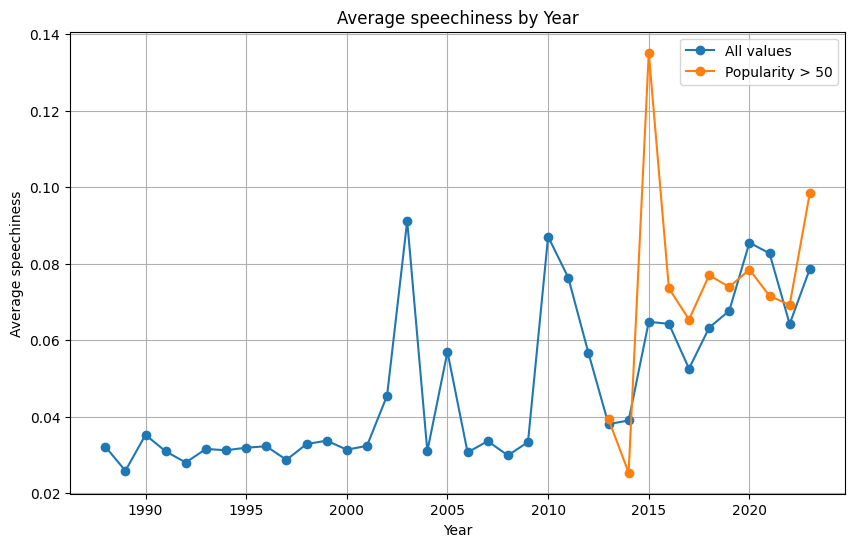

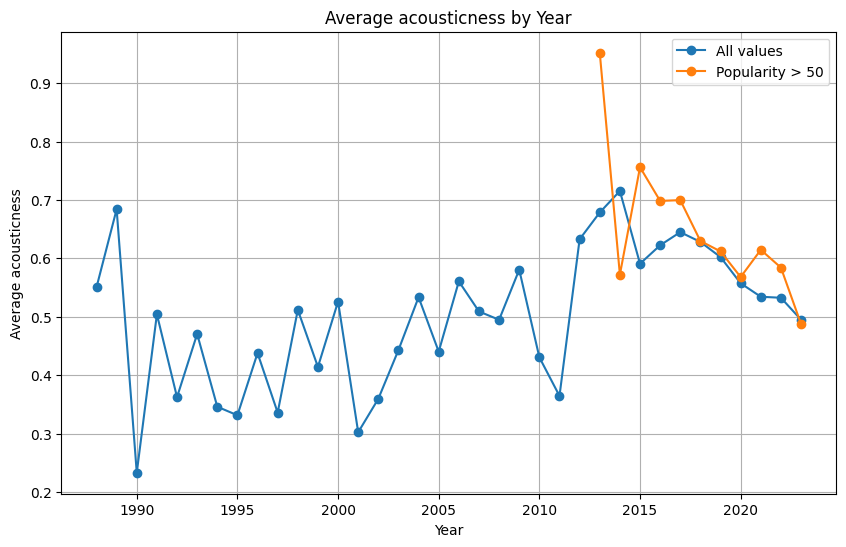

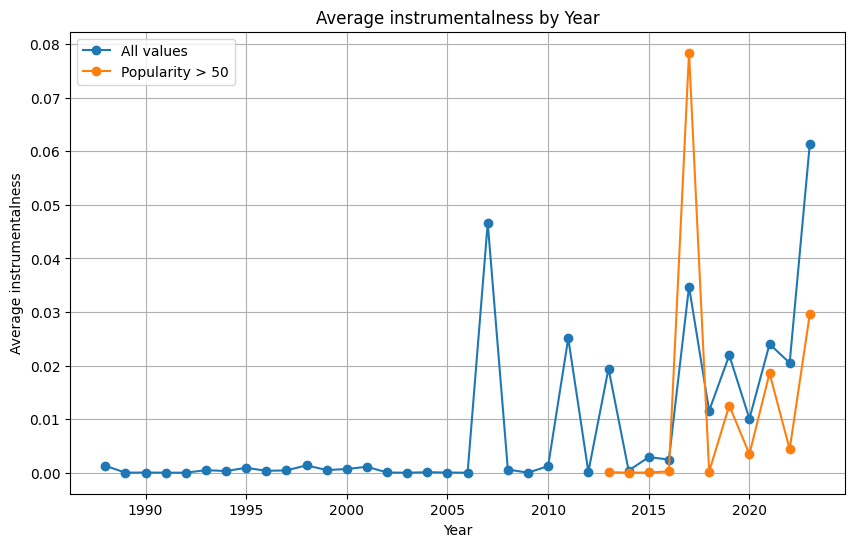

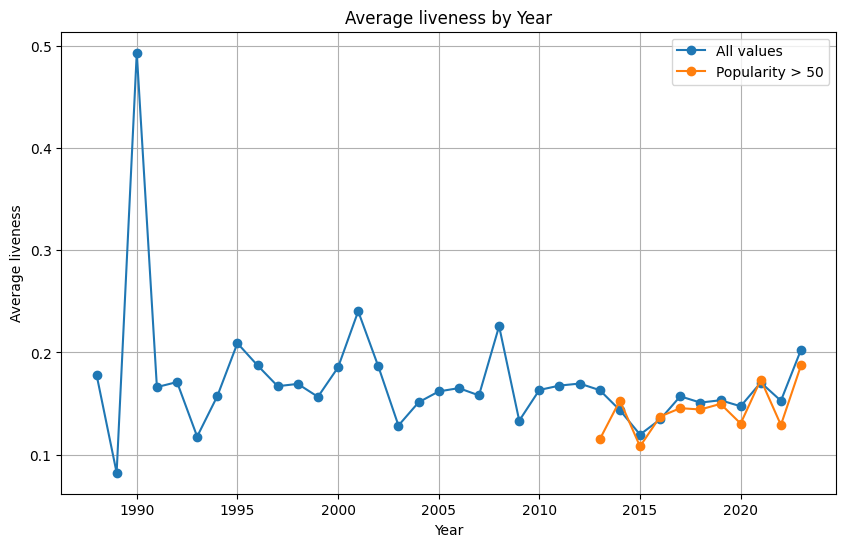

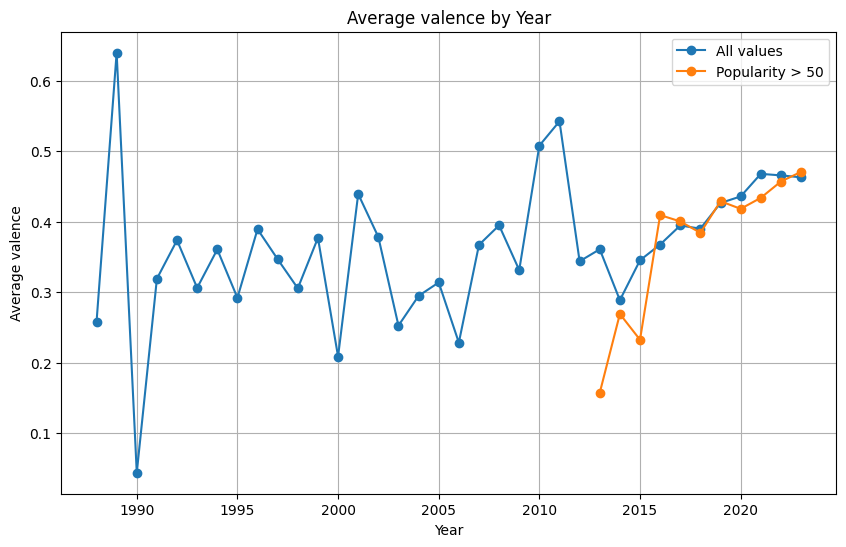

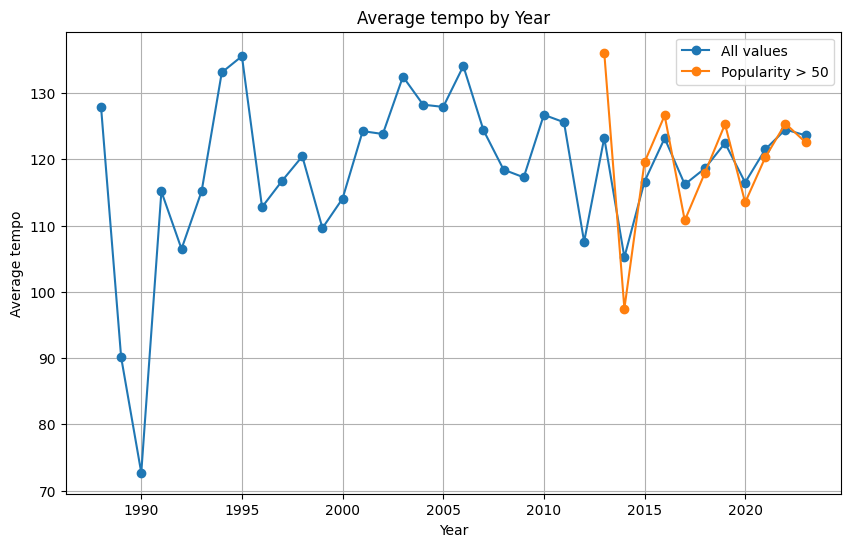

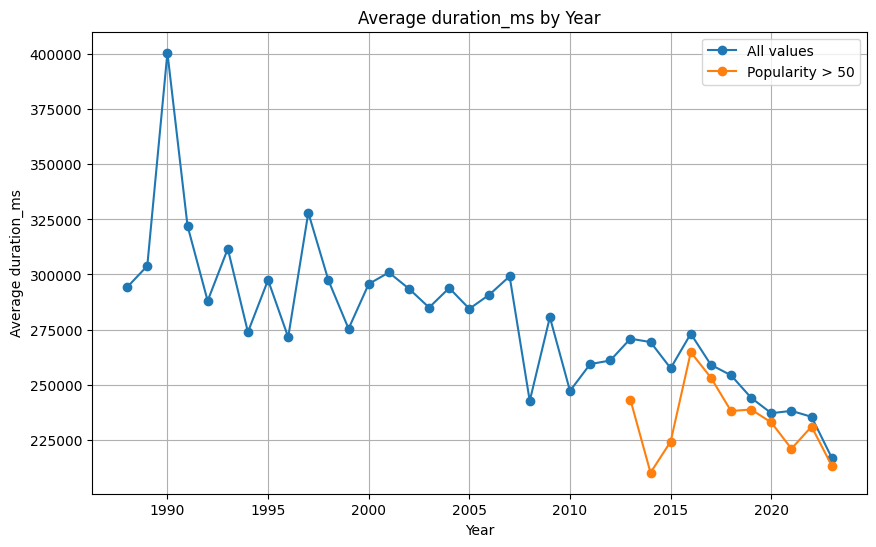

In [ ]:
columns = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
# Group all data by year and calculate the average of each column
average_by_year_all = df.groupby('year')[columns].mean()

# Filtering data where 'track_popularity' is greater than 65
filtered_df = df[df['track_pop'] > 50]

# Group filtered data by year and calculate the average of each column
average_by_year_filtered = filtered_df.groupby('year')[columns].mean()

for column in columns:
    plt.figure(figsize=(10, 6))
    plt.plot(average_by_year_all.index, average_by_year_all[column], marker='o', label='All values')
    plt.plot(average_by_year_filtered.index, average_by_year_filtered[column], marker='o', label='Popularity > 50')
    plt.xlabel('Year')
    plt.ylabel('Average ' + column)
    plt.title('Average ' + column + ' by Year')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
song_counts = df['artist_name'].value_counts()

df = df[df['artist_name'].isin(song_counts[song_counts > 10].index)]

# Group data by artist and calculate the average of each column
average_values = df.groupby('artist_name')[columns].mean()

top_artists_by_average_value = {}

# Getting the top 5 artists by the average of each column
for column in columns:
    top_artists_by_average_value[column] = average_values[column].nlargest(5)

for column, top_artists in top_artists_by_average_value.items():
    plt.figure(figsize=(10, 6))
    plt.barh(top_artists.index, top_artists.values, color='skyblue')
    plt.xlabel('Average ' + column)
    plt.title('Top 5 Artists by Average ' + column)
    plt.gca().invert_yaxis()
    plt.show()

# **Model**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [ ]:
def find_degree_kfold(model, X, y,  n_splits=5):
  order = [1, 2, 3 ,4]
  rsqu_test = []
  record = []

  for n in order:
    pr = PolynomialFeatures(degree=n)
    kf = KFold(n_splits=n_splits)
    r2_score = []

    for i, (train_index, test_index) in enumerate(kf.split(X)):
      # Split data
      X_train, y_train = X.iloc[train_index], y.iloc[train_index]
      X_test, y_test = X.iloc[test_index], y.iloc[test_index]

      # Scale Data
      # scaler = StandardScaler()
      # X_train_scaled = scaler.fit_transform(X_train)
      # X_test_scaled = scaler.transform(X_test)

      # Polynomial Features
      X_train_pr = pr.fit_transform(X_train)
      X_test_pr = pr.fit_transform(X_test)

      model.fit(X_train_pr, y_train)
      r2_score.append(model.score(X_test_pr, y_test))

    mean_r2 = np.mean(r2_score)
    dct = {
        'degree': n,
        'model': model,
        'R2': mean_r2
    }

    rsqu_test.append(mean_r2)
    record.append(dct)

  diff = []

  for i in range(len(rsqu_test)-1):
    diff.append(rsqu_test[i+1]-rsqu_test[i])
  diff = np.array(diff)
  degree = np.where(diff==diff.max())[0].item() + 1

  return record[degree]

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_uri', 'track_name', 'artist_name', 'artist_pop',
       'artist_genres', 'album', 'track_pop', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'duration_ms', 'time_signature',
       'date', 'checked_date', 'rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'year', 'v_pop', 'v_rap'],
      dtype='object')

In [ ]:
# Splitting features and target
temp = df.drop(df.loc[df.track_pop==0].index, axis=0)
x_data = temp.drop(['track_pop', 'Unnamed: 0'],axis = 1)
y_data = temp['track_pop']

print(f'Shape of x_train {x_data.shape} and y_data {y_data.shape}')

data = pd.get_dummies(x_data, columns=['time_signature', 'key', 'mode'], drop_first=True)

x_data = x_data.select_dtypes(exclude=['object'])

find_degree_kfold(LinearRegression(), x_data, y_data)

Shape of x_train (2149, 36) and y_data (2149,)


{'degree': 4, 'model': LinearRegression(), 'R2': -6.624243976858509}

In [ ]:
x_data.columns

Index(['artist_pop', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'rock viet',
       'vinahouse', 'viet edm', 'mainland se asia metal', 'vietnamese bolero',
       'indie viet', 'vietnamese trap', 'vietnamese hip hop', 'viet remix',
       'viet lo-fi', 'viet instrumental', 'year', 'v_pop', 'v_rap'],
      dtype='object')

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

# Standardize the features (optional but can help with model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.2718860437545054

In [ ]:
x_data.time_signature.unique()

array([4, 3, 1, 5])

In [ ]:
x_data.columns

Index(['artist_pop', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'rock viet',
       'vinahouse', 'viet edm', 'mainland se asia metal', 'vietnamese bolero',
       'indie viet', 'vietnamese trap', 'vietnamese hip hop', 'viet remix',
       'viet lo-fi', 'viet instrumental', 'year', 'v_pop', 'v_rap'],
      dtype='object')

In [ ]:
multivariate_ft = []
for i in range(2, len(x_data.columns)+1):
  for combs in combinations(x_data.columns, i):
    multivariate_ft.append(list(combs))
multivariate_ft

In [ ]:
def train_test_step_multivariate_kfold(features, n_splits):
  fts = []
  kf = KFold(n_splits=n_splits)
  for f_ in features:
    r2_scores, mse = [], []
    model = LinearRegression()

    X, y = df[f_], df['price']
    for i, (train_index, test_index) in enumerate(kf.split(X)):
      X_train, y_train = X.iloc[train_index], y.iloc[train_index]
      X_test, y_test = X.iloc[test_index], y.iloc[test_index]

      # Fit
      model.fit(X_train, y_train)

      # Predict
      y_pred = model.predict(X_test)

      # Evaluation
      score = r2_score(y_test, y_pred)
      r2_scores.append(score)

    score = np.mean(r2_scores)
    # if np.mean(r2_scores) >= 0.7:
    #   fts[f_] = [model, np.mean(r2_scores)]
    if score >= 0.7:
      fts.append([f_, score])

  return fts


## **Test**

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UIT/Ky 5/DS105/DO_AN/Data/df_combined_final.csv')
df.head()

NameError: ignored

## **Experiment 1 (Use)**

In [ ]:
temp = df.drop(df.loc[df.track_pop==0].index, axis=0)
x_data = temp.drop(['track_pop', 'Unnamed: 0'],axis = 1)
y_data = temp['track_pop']

print(f'Shape of x_train {x_data.shape} and y_data {y_data.shape}')

x_data = x_data.select_dtypes(exclude=['object'])

data = pd.get_dummies(x_data, columns=['time_signature', 'key', 'mode'], drop_first=True)

data

Shape of x_train (2149, 36) and y_data (2149,)


artist_pop  danceability  energy  loudness  speechiness  acousticness  \
0             54         0.758   0.246   -16.913       0.1700        0.2030   
1             54         0.844   0.677    -5.958       0.0564        0.1710   
2             54         0.775   0.440    -9.050       0.0355        0.4930   
3             52         0.843   0.484    -8.246       0.0530        0.7060   
4             58         0.664   0.531   -10.227       0.0391        0.6740   
...          ...           ...     ...       ...          ...           ...   
2451          43         0.720   0.215   -12.569       0.0382        0.8490   
2452          21         0.393   0.300   -13.835       0.0307        0.4950   
2453          29         0.718   0.449   -10.266       0.0286        0.0235   
2454          24         0.553   0.228   -13.690       0.0298        0.4720   
2455          51         0.846   0.755    -5.013       0.0378        0.4970   

      instrumentalness  liveness  valence    tempo  ...  key_3  key_4  key_5  \
0             0.000000    0.1010    0.490   77.010  ...      0      0      0   
1             0.000023    0.3870    0.791  111.006  ...      0      0      0   
2             0.000222    0.0591    0.451   99.993  ...      0      0      0   
3             0.000000    0.0980    0.356  129.987  ...      0      0      1   
4             0.000015    0.3530    0.644   90.960  ...      1      0      0   
...                ...       ...      ...      ...  ...    ...    ...    ...   
2451          0.000010    0.0912    0.215  116.054  ...      0      0      0   
2452          0.000129    0.2940    0.315  182.599  ...      0      0      1   
2453          0.000007    0.2450    0.274  103.226  ...      0      0      0   
2454          0.000781    0.1320    0.214  131.775  ...      0      0      0   
2455          0.000984    0.0696    0.854   97.009  ...      0      0      0   

      key_6  key_7  key_8  key_9  key_10  key_11  mode_1  
0         0      1      0      0       0       0       1  
1         1      0      0      0       0       0       1  
2         0      0      0      1       0       0       0  
3         0      0      0      0       0       0       1  
4         0      0      0      0       0       0       1  
...     ...    ...    ...    ...     ...     ...     ...  
2451      0      0      0      1       0       0       0  
2452      0      0      0      0       0       0       1  
2453      0      1      0      0       0       0       1  
2454      0      0      0      0       0       0       0  
2455      0      0      0      0       0       0       0  

[2149 rows x 40 columns]

In [ ]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
# lr.score(X_test, y_test)

pred = lr.predict(X_test_scaled)
print(f'R2: {r2_score(y_test, pred)}')

R2: 0.44458283349520755


In [ ]:
# Random Forest
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train_scaled, y_train)
# regressor.score(X_test, y_test)

pred = regressor.predict(X_test_scaled)
print(f'R2: {r2_score(y_test, pred)}')

R2: 0.6240635028702053


In [ ]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train_scaled, y_train)
svr.score(X_test_scaled, y_test)

0.4263331761230772

## **Experiment 2**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Plot corr
df_1 = df.drop(['checked_date', 'rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'v_pop', 'v_rap', 'Unnamed: 0', 'key', 'mode', 'time_signature'], axis=1)
df_1.drop(df.loc[df_1.track_pop==0].index, axis=0, inplace=True)
sn.heatmap(df_1.corr(), annot=True, fmt='.1f')

In [ ]:
temp = df.drop(df.loc[df.track_pop==0].index, axis=0)
x_data = temp.drop(['track_pop', 'Unnamed: 0'],axis = 1)
y_data = temp['track_pop']

data = x_data.select_dtypes(exclude='object')
# data.drop(genres, axis=1, inplace=True)
data = pd.get_dummies(data, columns=['time_signature', 'key', 'mode'], drop_first=True)

data.head()

artist_pop  danceability  energy  loudness  speechiness  acousticness  \
0          54         0.758   0.246   -16.913       0.1700         0.203   
1          54         0.844   0.677    -5.958       0.0564         0.171   
2          54         0.775   0.440    -9.050       0.0355         0.493   
3          52         0.843   0.484    -8.246       0.0530         0.706   
4          58         0.664   0.531   -10.227       0.0391         0.674   

   instrumentalness  liveness  valence    tempo  ...  key_3  key_4  key_5  \
0          0.000000    0.1010    0.490   77.010  ...      0      0      0   
1          0.000023    0.3870    0.791  111.006  ...      0      0      0   
2          0.000222    0.0591    0.451   99.993  ...      0      0      0   
3          0.000000    0.0980    0.356  129.987  ...      0      0      1   
4          0.000015    0.3530    0.644   90.960  ...      1      0      0   

   key_6  key_7  key_8  key_9  key_10  key_11  mode_1  
0      0      1      0      0       0       0       1  
1      1      0      0      0       0       0       1  
2      0      0      0      1       0       0       0  
3      0      0      0      0       0       0       1  
4      0      0      0      0       0       0       1  

[5 rows x 40 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.42953516180562223

In [ ]:
# Random Forest
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train_scaled, y_train)
regressor.score(X_test_scaled, y_test)

0.5902572373760475

## **Experiment 3**

In [ ]:
genres = ['rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'v_pop', 'v_rap']

In [ ]:
temp = df.drop(df.loc[df.track_pop==0].index, axis=0)
x_data = temp.drop(['track_pop', 'Unnamed: 0'],axis = 1)
y_data = temp['track_pop']

data = x_data.select_dtypes(exclude='object')
data.drop(genres, axis=1, inplace=True)
data = pd.get_dummies(data, columns=['time_signature', 'key', 'mode'], drop_first=True)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.4480977808768709

In [ ]:
# Random Forest
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train_scaled, y_train)
regressor.score(X_test_scaled, y_test)

0.5826084722962213

## **Experiment 4**

<ipython-input-9-38c229b77f09>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df_1.corr(), annot=True, fmt='.1f', cmap='Blues')


<Axes: >

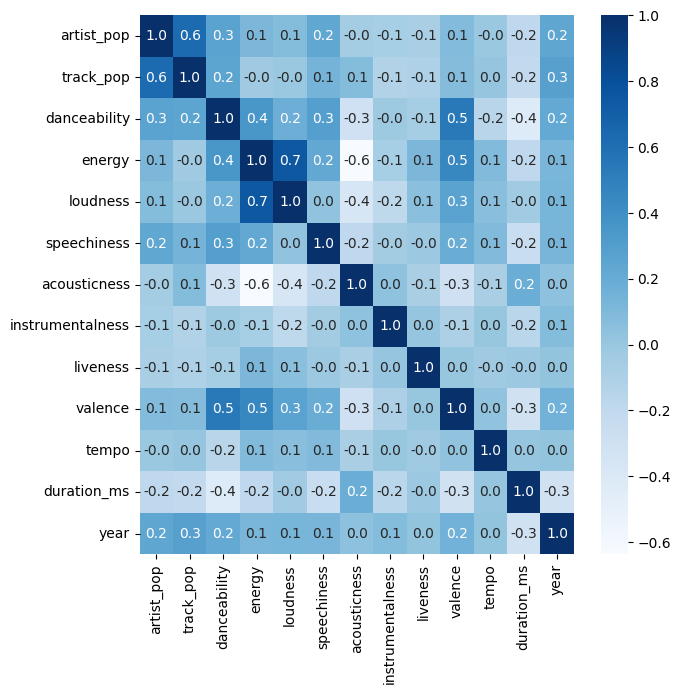

In [ ]:
# Plot corr
df_1 = df.drop(['checked_date', 'rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'v_pop', 'v_rap', 'Unnamed: 0', 'key', 'mode', 'time_signature'], axis=1)
df_1.drop(df_1.loc[df_1.track_pop==0].index, axis=0, inplace=True)
plt.figure(figsize=(7, 7))
sn.heatmap(df_1.corr(), annot=True, fmt='.1f', cmap='Blues')

In [ ]:
temp = df.drop(df.loc[df.track_pop==0].index, axis=0)
cols = ['duration_ms', 'danceability', 'artist_pop', 'year']
X = temp[cols]
y = temp['track_pop']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.40891301008867953

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train_scaled, y_train)
regressor.score(X_test_scaled, y_test)

0.5425151891263882

In [ ]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train_scaled, y_train)
svr.score(X_test_scaled, y_test)

0.43423841165120414

## **Experiment 5 (USE)**

In [ ]:
temp = df.drop(df.loc[df.track_pop==0].index, axis=0)
cols = ['duration_ms', 'danceability', 'artist_pop', 'year',  'rock viet', 'vinahouse', 'viet edm',
       'mainland se asia metal', 'vietnamese bolero', 'indie viet',
       'vietnamese trap', 'vietnamese hip hop', 'viet remix', 'viet lo-fi',
       'viet instrumental', 'v_pop', 'v_rap', 'key', 'mode', 'time_signature']
X = temp[cols]
X = pd.get_dummies(X, columns=['time_signature', 'key', 'mode'], drop_first=True)
y = temp['track_pop']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.41653314326281643

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train_scaled, y_train)
regressor.score(X_test_scaled, y_test)

0.5934554749906376

In [ ]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train_scaled, y_train)
svr.score(X_test_scaled, y_test)

0.40098896487199387

# **Final Model**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UIT/Ky 5/DS105/DO_AN/Data/df_combined_final_drop_duplicate_4.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# df.to_csv('/content/drive/MyDrive/UIT/Ky 5/DS105/DO_AN/Data/df_combined_final_drop_duplicate_4.csv')

## **Experiment 1**

In [ ]:
temp = df.drop(df.loc[df.track_pop==0].index, axis=0)
x_data = temp.drop(['track_pop'],axis = 1)
y = temp['track_pop']

x_data = x_data.select_dtypes(exclude=['object'])

X = pd.get_dummies(x_data, columns=['time_signature', 'key', 'mode'], drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1504, 645, 1504, 645)

In [ ]:
scaler = StandardScaler()
X_train_transform = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)

In [ ]:
param_grid = {'fit_intercept': [0, 1], 'copy_X': [0, 1], 'n_jobs': [2, 3, 5]}

In [ ]:
grid = GridSearchCV(LinearRegression(), param_grid, refit=True, verbose=2, scoring='neg_mean_squared_error')
grid.fit(X_train_transform, y_train)

In [ ]:
grid_results = pd.DataFrame(grid.cv_results_)
grid_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_score_time', 'mean_fit_time']].sort_values(by=['rank_test_score'])

params  mean_test_score  \
0   {'copy_X': 0, 'fit_intercept': 0, 'n_jobs': 2}    -2.393506e+06   
1   {'copy_X': 0, 'fit_intercept': 0, 'n_jobs': 3}    -2.393506e+06   
2   {'copy_X': 0, 'fit_intercept': 0, 'n_jobs': 5}    -2.393506e+06   
6   {'copy_X': 1, 'fit_intercept': 0, 'n_jobs': 2}    -2.393506e+06   
7   {'copy_X': 1, 'fit_intercept': 0, 'n_jobs': 3}    -2.393506e+06   
8   {'copy_X': 1, 'fit_intercept': 0, 'n_jobs': 5}    -2.393506e+06   
3   {'copy_X': 0, 'fit_intercept': 1, 'n_jobs': 2}    -4.616885e+22   
4   {'copy_X': 0, 'fit_intercept': 1, 'n_jobs': 3}    -4.616885e+22   
5   {'copy_X': 0, 'fit_intercept': 1, 'n_jobs': 5}    -4.616885e+22   
9   {'copy_X': 1, 'fit_intercept': 1, 'n_jobs': 2}    -4.616885e+22   
10  {'copy_X': 1, 'fit_intercept': 1, 'n_jobs': 3}    -4.616885e+22   
11  {'copy_X': 1, 'fit_intercept': 1, 'n_jobs': 5}    -4.616885e+22   

    std_test_score  rank_test_score  mean_score_time  mean_fit_time  
0     4.783423e+06                1         0.005588       0.042076  
1     4.783423e+06                1         0.006183       0.030912  
2     4.783423e+06                1         0.006340       0.024005  
6     4.783423e+06                1         0.004198       0.025476  
7     4.783423e+06                1         0.007445       0.023392  
8     4.783423e+06                1         0.004028       0.020358  
3     9.233769e+22                7         0.008630       0.033449  
4     9.233769e+22                7         0.006826       0.036324  
5     9.233769e+22                7         0.004800       0.024153  
9     9.233769e+22                7         0.005214       0.041315  
10    9.233769e+22                7         0.002605       0.026614  
11    9.233769e+22                7         0.003869       0.023079

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UIT/Ky 5/DS105/DO_AN/Data/df_combined_final_drop_duplicate_4.csv')


In [ ]:
columns = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
# Group all data by year and calculate the average of each column
average_by_year_all = df.groupby('year')[columns].mean()

# Filtering data where 'track_popularity' is greater than 65
filtered_df = df[df['track_pop'] > 50]

# Group filtered data by year and calculate the average of each column
average_by_year_filtered = filtered_df.groupby('year')[columns].mean()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def check_datetime(date):
  try:
    return pd.to_datetime(date, format='%Y-%m-%d')
  except:
    return 'Failed_Date'
df['checked_date'] = df.date.apply(check_datetime)

from datetime import date

df['date_ordinal'] = pd.to_datetime(df['checked_date']).apply(lambda date: date.toordinal())

df.checked_date = pd.to_datetime(df.checked_date)

In [ ]:
df_1 = df.copy().sort_values('track_pop', ascending=False).drop_duplicates()


top50song = df_1[['artist_name', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms', 'v_pop', 'v_rap', 'track_pop']].drop_duplicates()[:200]
top50song.head()

artist_name  danceability  energy  speechiness  acousticness  \
0     Wren Evans         0.758   0.246       0.1700         0.203   
1338       Karik         0.843   0.484       0.0530         0.706   
1      Phương Ly         0.844   0.677       0.0564         0.171   
1337        Binz         0.775   0.440       0.0355         0.493   
57           W/N         0.593   0.325       0.0296         0.957   

      instrumentalness  liveness  valence  duration_ms  v_pop  v_rap  \
0             0.000000    0.1010    0.490       175545    1.0    1.0   
1338          0.000000    0.0980    0.356       300719    1.0    0.0   
1             0.000023    0.3870    0.791       188108    1.0    0.0   
1337          0.000222    0.0591    0.451       268200    1.0    0.0   
57            0.219000    0.2860    0.442       271705    1.0    0.0   

      track_pop  
0            71  
1338         71  
1            70  
1337         70  
57           70

In [ ]:
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

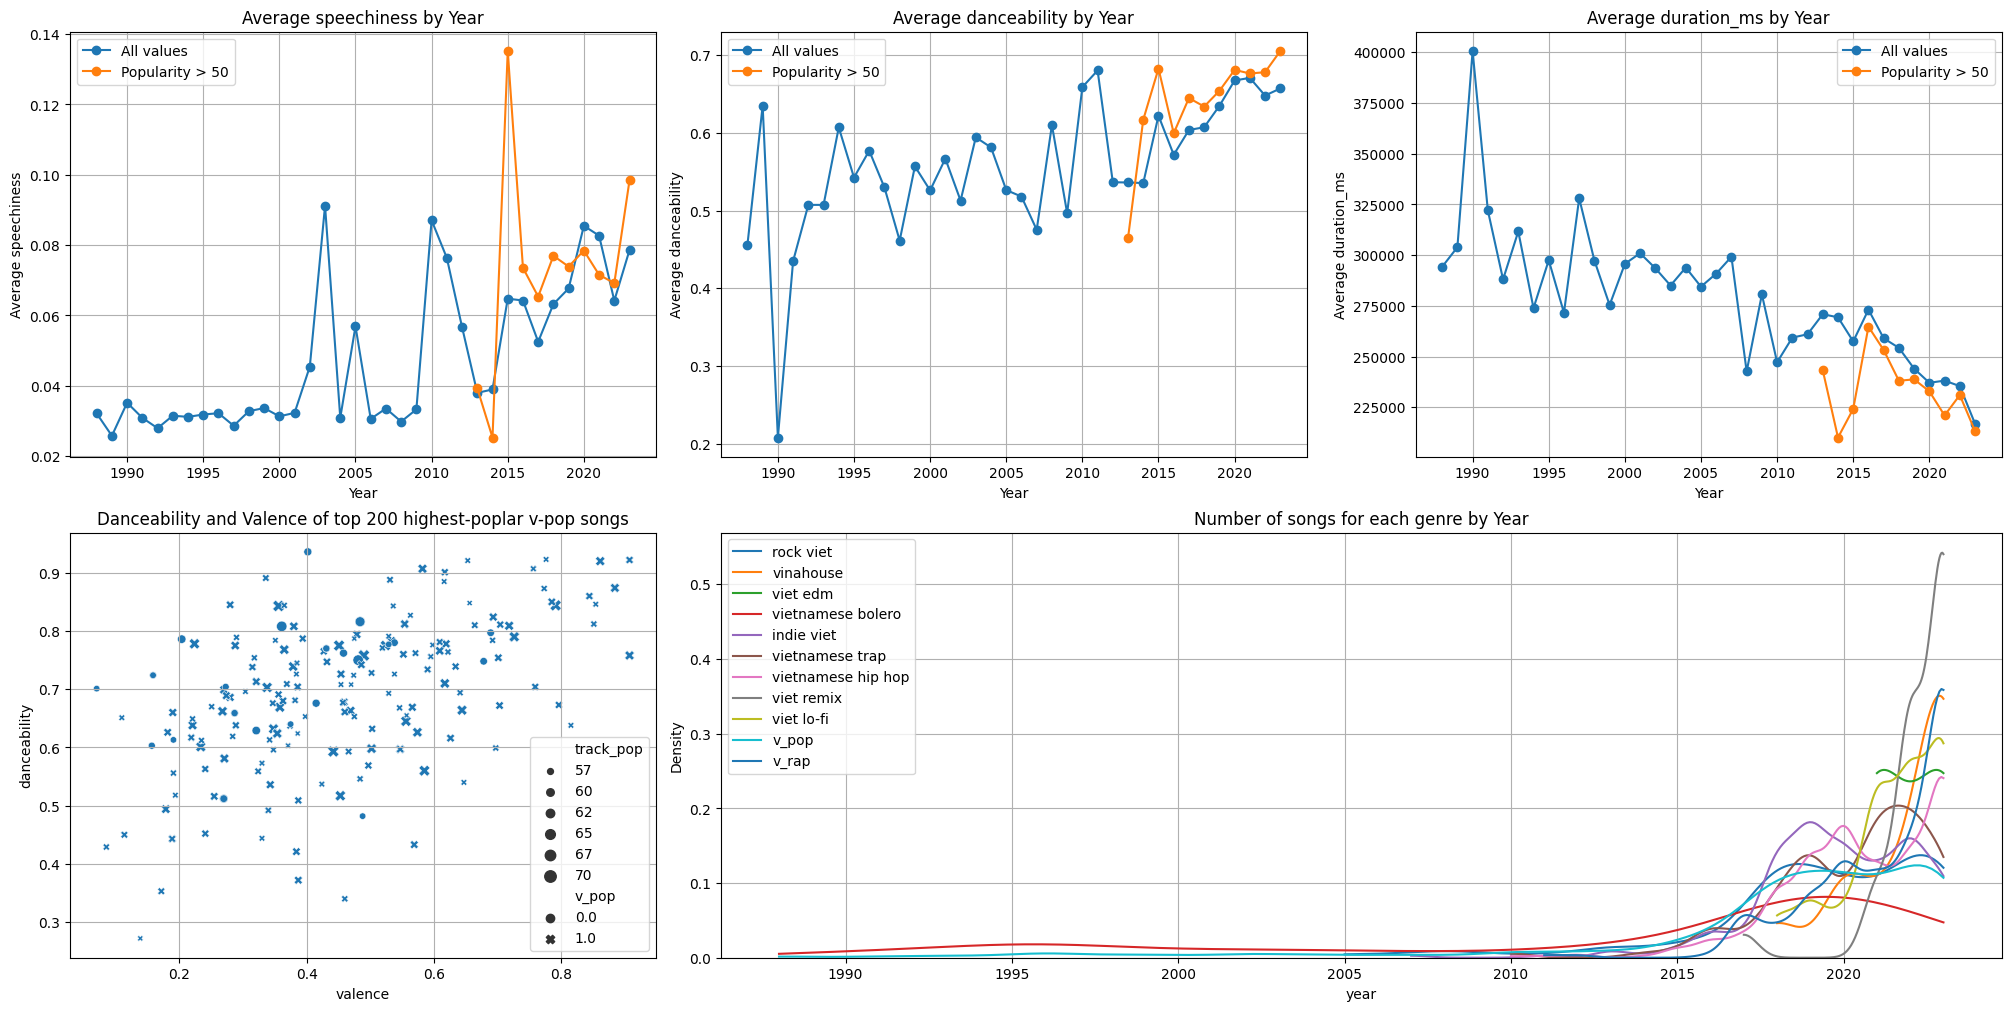

In [ ]:
fig = plt.figure(figsize=(20, 10),
                 layout="constrained")
ax_dict = fig.subplot_mosaic(
    """ABC
       DEE"""
)
ax_dict["C"].plot(average_by_year_all.index, average_by_year_all['duration_ms'], marker='o', label='All values')
ax_dict["C"].plot(average_by_year_filtered.index, average_by_year_filtered['duration_ms'], marker='o', label='Popularity > 50')
ax_dict["C"].grid()
ax_dict["C"].set_ylabel('Average duration_ms')
ax_dict["C"].set_xlabel('Year')
ax_dict["C"].set_title('Average ' + 'duration_ms' + ' by Year')
ax_dict["C"].legend()


ax_dict["B"].plot(average_by_year_all.index, average_by_year_all['danceability'], marker='o', label='All values')
ax_dict["B"].plot(average_by_year_filtered.index, average_by_year_filtered['danceability'], marker='o', label='Popularity > 50')
ax_dict["B"].grid()
ax_dict["B"].set_ylabel('Average danceability')
ax_dict["B"].set_xlabel('Year')
ax_dict["B"].set_title('Average ' + 'danceability' + ' by Year')
ax_dict["B"].legend()

ax_dict["A"].plot(average_by_year_all.index, average_by_year_all['speechiness'], marker='o', label='All values')
ax_dict["A"].plot(average_by_year_filtered.index, average_by_year_filtered['speechiness'], marker='o', label='Popularity > 50')
ax_dict["A"].grid()
ax_dict["A"].set_ylabel('Average speechiness')
ax_dict["A"].set_xlabel('Year')
ax_dict["A"].set_title('Average ' + 'speechiness' + ' by Year')
ax_dict["A"].legend()


sn.kdeplot(data=df_1[df_1['rock viet'] == 1], x='year', label='rock viet', cut=0, bw_adjust=0.7, ax=ax_dict["E"])
sn.kdeplot(data=df_1[df_1['vinahouse'] == 1], x='year', label='vinahouse', cut=0, bw_adjust=0.7, ax=ax_dict["E"])
sn.kdeplot(data=df_1[df_1['viet edm'] == 1], x='year', label='viet edm', cut=0, bw_adjust=0.7, ax=ax_dict["E"])
sn.kdeplot(data=df_1[df_1['vietnamese bolero'] == 1], x='year', label='vietnamese bolero', cut=0, bw_adjust=0.7, ax=ax_dict["E"])
sn.kdeplot(data=df_1[df_1['indie viet'] == 1], x='year', label='indie viet', cut=0, bw_adjust=0.7, ax=ax_dict["E"])
sn.kdeplot(data=df_1[df_1['vietnamese trap'] == 1], x='year', label='vietnamese trap', cut=0, bw_adjust=0.7)
sn.kdeplot(data=df_1[df_1['vietnamese hip hop'] == 1], x='year', label='vietnamese hip hop', cut=0, bw_adjust=0.7, ax=ax_dict["E"])
sn.kdeplot(data=df_1[df_1['viet remix'] == 1], x='year', label='viet remix', cut=0, bw_adjust=0.7, ax=ax_dict["E"])
sn.kdeplot(data=df_1[df_1['viet lo-fi'] == 1], x='year', label='viet lo-fi', cut=0, bw_adjust=0.7, ax=ax_dict["E"])
sn.kdeplot(data=df_1[df_1['v_pop'] == 1], x='year', label='v_pop', cut=0, bw_adjust=0.7, ax=ax_dict["E"])
sn.kdeplot(data=df_1[df_1['v_rap'] == 1], x='year', label='v_rap', cut=0, bw_adjust=0.7, ax=ax_dict["E"])
ax_dict["E"].set_title('Number of songs for each genre by Year')
ax_dict["E"].grid()
ax_dict["E"].legend()

sn.scatterplot(data=top50song, x="valence", y='danceability', size='track_pop', style='v_pop', ax=ax_dict['D'])
ax_dict['D'].set_title('Danceability and Valence of top 200 highest-poplar v-pop songs')
ax_dict["D"].grid()
ax_dict["D"].legend()
# identify_axes(ax_dict)

In [ ]:
'https://open.spotify.com/playlist/37i9dQZF1DX0F4i7Q9pshJ'.split("/")[-1].split("?")

['37i9dQZF1DX0F4i7Q9pshJ']

In [ ]:
columns = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
# Group all data by year and calculate the average of each column
average_by_year_all = df.groupby('year')[columns].mean()

# Filtering data where 'track_popularity' is greater than 65
filtered_df = df[df['track_pop'] > 50]

# Group filtered data by year and calculate the average of each column
average_by_year_filtered = filtered_df.groupby('year')[columns].mean()

In [ ]:
average_by_year_all.loc[average_by_year_all.danceability > 0.65]

danceability    energy  loudness      mode  speechiness  acousticness  \
year                                                                          
2010      0.658842  0.563947 -7.430000  0.473684     0.087068      0.430563   
2011      0.680267  0.605933 -6.950867  0.600000     0.076367      0.364467   
2020      0.667395  0.511733 -8.234865  0.645533     0.085493      0.557274   
2021      0.670715  0.521146 -8.485939  0.536585     0.082702      0.534256   
2023      0.657096  0.540572 -8.593556  0.594966     0.078612      0.494926   

      instrumentalness  liveness   valence       tempo    duration_ms  
year                                                                   
2010          0.001232  0.163311  0.508053  126.721368  247178.789474  
2011          0.025094  0.167573  0.542607  125.597200  259340.666667  
2020          0.010076  0.147340  0.435891  116.499885  237071.878963  
2021          0.024003  0.170572  0.467961  121.503675  238133.776423  
2023          0.061359  0.202732  0.463051  123.618435  216909.059497

In [ ]:
columns = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
# Group all data by year and calculate the average of each column
average_by_year_all = df.groupby('year')[columns].mean()
average_by_year_all.loc[average_by_year_all.speechiness > 0.1]

Empty DataFrame
Columns: [danceability, energy, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms]
Index: []

In [ ]:
average_by_year_filtered

danceability    energy   loudness      mode  speechiness  acousticness  \
year                                                                           
2013      0.465000  0.088600 -13.165000  1.000000     0.039300      0.952000   
2014      0.617000  0.364000  -7.568000  1.000000     0.025300      0.572000   
2015      0.682667  0.435867  -9.995000  1.000000     0.135189      0.756000   
2016      0.599542  0.432125  -8.211333  0.833333     0.073546      0.698292   
2017      0.644775  0.502650  -8.115275  0.725000     0.065380      0.699665   
2018      0.633826  0.470874  -9.123804  0.586957     0.076965      0.629686   
2019      0.654014  0.506236  -7.637792  0.527778     0.073908      0.611839   
2020      0.681008  0.496508  -8.468532  0.785714     0.078457      0.567978   
2021      0.676376  0.443667  -9.587032  0.623656     0.071563      0.614595   
2022      0.678038  0.512137  -8.606870  0.549618     0.069198      0.584142   
2023      0.705308  0.544168  -8.664055  0.616438     0.098451      0.487512   

      instrumentalness  liveness   valence       tempo    duration_ms  
year                                                                   
2013          0.000121  0.115000  0.157000  136.092000  243226.000000  
2014          0.000005  0.153000  0.269000   97.478000  210068.000000  
2015          0.000051  0.108111  0.232333  119.555556  224194.333333  
2016          0.000241  0.137333  0.409417  126.617417  264744.291667  
2017          0.078390  0.145503  0.400400  110.770600  253196.500000  
2018          0.000206  0.144222  0.384213  117.967804  238070.478261  
2019          0.012537  0.149707  0.429083  125.303625  238749.819444  
2020          0.003467  0.130469  0.418275  113.488040  232869.126984  
2021          0.018580  0.173413  0.433909  120.302548  220959.924731  
2022          0.004380  0.129037  0.457089  125.401008  231010.480916  
2023          0.029612  0.187460  0.470766  122.568062  213303.164384

In [ ]:
filtered_df.loc[filtered_df.year==2015]['speechiness']

372     0.0381
425     0.2390
1066    0.0381
1166    0.2390
1615    0.1760
1977    0.0334
1978    0.0381
1992    0.2390
2335    0.1760
Name: speechiness, dtype: float64

In [ ]:
df.iloc[1992]

Unnamed: 0                                                         1992
track_uri                          spotify:track:3EuOQ0v6LxsNFSf3BF5wrw
track_name                                                      Mot Nha
artist_name                                                      Da LAB
artist_pop                                                           56
artist_genres             ['indie viet', 'v-pop', 'vietnamese hip hop']
album                                                           Mot Nha
track_pop                                                            52
danceability                                                      0.822
energy                                                            0.684
key                                                                   0
loudness                                                         -5.873
mode                                                                  1
speechiness                                                     